In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**1. Importing Libraries**##

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from cycler import cycler
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

##**2. Loading the Data**##

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data for Practice/Shop_Sales_Regression.csv')
data

,Sl.No,Product_Weight,Product_Fat_Content,Product_Visibility,Product_Type,Product_MRP,Shop_Identifier,Shop_Establishment_Year,Shop_Size,Shop_Location_Type,Shop_Type,Shop_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sl.No                    8523 non-null   object 
 1   Product_Weight           7060 non-null   float64
 2   Product_Fat_Content      8523 non-null   object 
 3   Product_Visibility       8523 non-null   float64
 4   Product_Type             8523 non-null   object 
 5   Product_MRP              8523 non-null   float64
 6   Shop_Identifier          8523 non-null   object 
 7   Shop_Establishment_Year  8523 non-null   int64  
 8   Shop_Size                6113 non-null   object 
 9   Shop_Location_Type       8523 non-null   object 
 10  Shop_Type                8523 non-null   object 
 11  Shop_Outlet_Sales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.nunique()

Sl.No                      1559
Product_Weight              415
Product_Fat_Content           5
Product_Visibility         7880
Product_Type                 16
Product_MRP                5938
Shop_Identifier              10
Shop_Establishment_Year       9
Shop_Size                     3
Shop_Location_Type            3
Shop_Type                     4
Shop_Outlet_Sales          3493
dtype: int64

##**3.Cleaning The Data**##

###**3.1 Imputing Missing Values**###

####**3.1.1 Imputing Missing Values for Shop Sizes of Grocery Shops in Tier3 Location**####

#####**3.1.1.a Finding Missing Values for Grocery Shops in Tier3 Location**#####

In [ ]:
# Filling missing values for Shop Size based on Grocery Store Type and Shop IDentifier
print(data[data['Shop_Type']=='Grocery Store'].Shop_Size.value_counts())  # All Grocery Stores are Small Sized Shops
print(data[data['Shop_Type']=='Grocery Store'].Shop_Size.isna().sum())
print(data[data['Shop_Type']=='Grocery Store'].Shop_Location_Type.value_counts())
print(data[data['Shop_Type']=='Grocery Store'].Shop_Identifier.value_counts())

Small    528
Name: Shop_Size, dtype: int64
555
Tier 3    555
Tier 1    528
Name: Shop_Location_Type, dtype: int64
OUT010    555
OUT019    528
Name: Shop_Identifier, dtype: int64


#####**3.1.1.b Analysis to findout Correct Missing Values for Grocery Shops in Tier3 Location**#####

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a6758f810>,
      dtype=object)

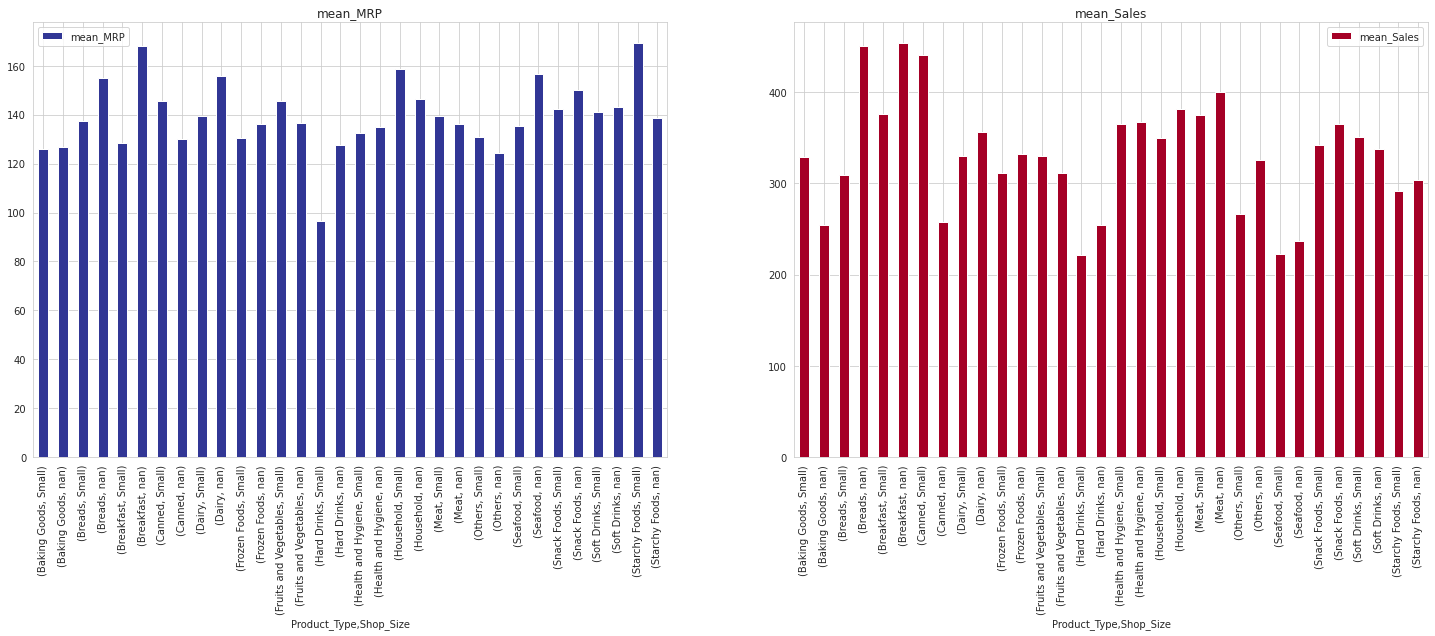

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
groceryshopdataframe=data[ data['Shop_Type']=='Grocery Store']
groceryshopdataframe.groupby(by=['Product_Type','Shop_Size'],dropna=False)\
.agg(mean_MRP=('Product_MRP',np.mean),mean_Sales=('Shop_Outlet_Sales',np.mean))\
.plot(subplots=True,kind='bar',layout=(1,2),ax=ax,cmap="RdYlBu_r")

#PuOr_r,Accent,viridis,cividis,rainbow,jet

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a62f12110>,
      dtype=object)

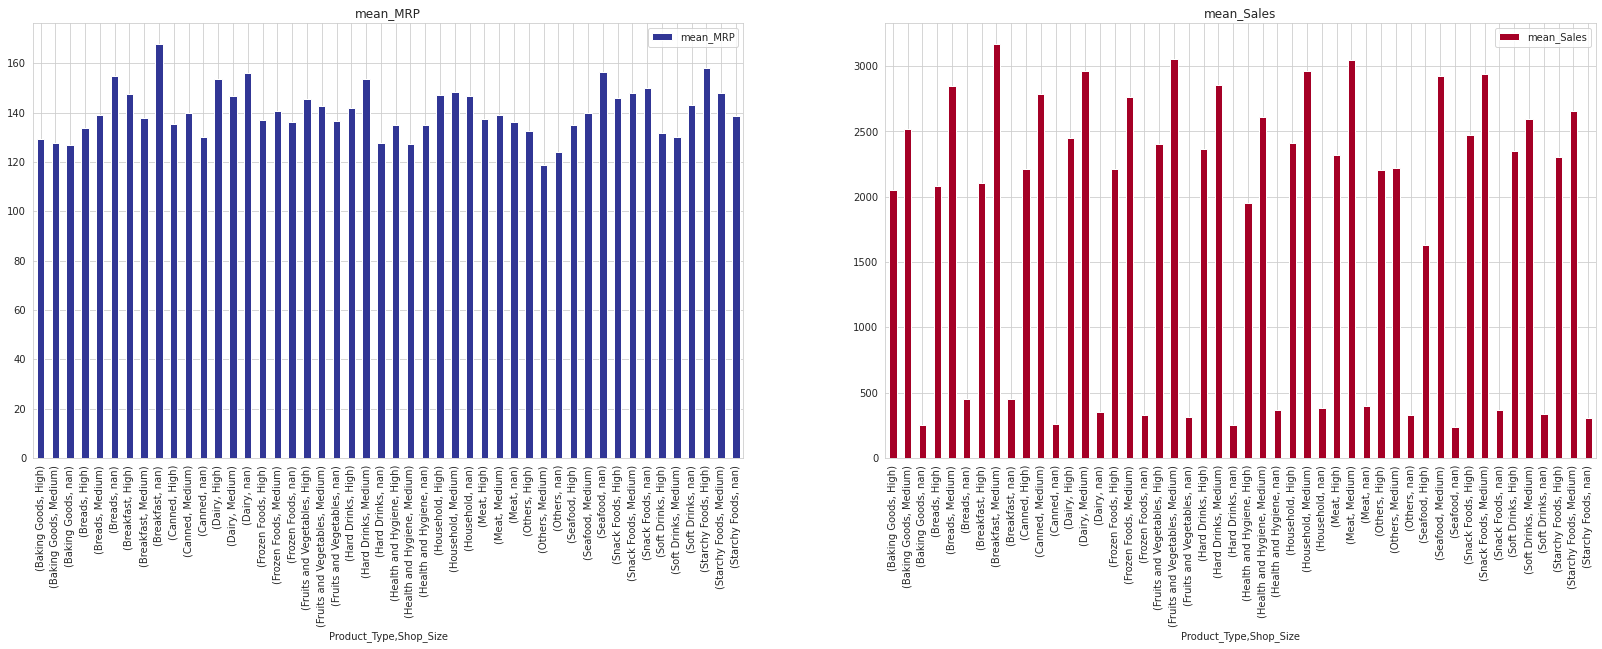

In [ ]:
fig, ax = plt.subplots(figsize=(28, 8))
Tier3shopdataframe=data[ data['Shop_Location_Type']=='Tier 3']
Tier3shopdataframe.groupby(by=['Product_Type','Shop_Size'],dropna=False)\
.agg(mean_MRP=('Product_MRP',np.mean),mean_Sales=('Shop_Outlet_Sales',np.mean))\
.plot(subplots=True,kind='bar',layout=(1,2),ax=ax,cmap="RdYlBu_r") 

**1.With the above analysis ,It seems "Grocery Shop" of "Tier 3" with "OUT010" Identifier have 555 Missing Values in "Shop Size" Column </br>2. In Plot1, Missing Value have close resemblance with Small sized Shops in 'Mean Product MRP'</br>3. In Plot2, it seems the sales at unknown size have large differnece.</br> 4. SO 555 missing values  will be imputed with 'Small' Size shops**

#####**3.1.1.c Filling Missing Values for Grocery Shops in Tier3 Location**#####

In [ ]:
# Imputing Missing Values for Grocery type Shops

print(f"{data[data['Shop_Identifier']=='OUT010'].Shop_Size.isna().sum()}  missing Values for OUT010 Shop Identifier")

# Imputing Shop_size as small for Grocery Store Shop type

mask=data['Shop_Identifier']=='OUT010'

data.loc[mask,'Shop_Size']=data.loc[mask,'Shop_Size'].fillna('Small')

print(f"{data[data['Shop_Identifier']=='OUT010'].Shop_Size.isna().sum()}  missing Values for OUT010 Shop Identifier")


555  missing Values for OUT010 Shop Identifier
0  missing Values for OUT010 Shop Identifier


####**3.1.2 Imputing Missing Values for Shop Sizes of Type 1 Super Markets in Tier2 Location**####

#####**3.1.2.a Finding Missing Values for Type 1 Super Markets in Tier2 Location**#####

In [ ]:
# Filling missing values for Shop Size based on Supermarket Type1 Type and Shop IDentifier
print(data[data['Shop_Type']=='Supermarket Type1'].Shop_Size.value_counts())  # All Grocery Stores are Small Sized Shops
print(data[data['Shop_Type']=='Supermarket Type1'].Shop_Size.isna().sum())
print(data[data['Shop_Location_Type']=='Tier 2'].Shop_Size.isna().sum())

Small     1860
High       932
Medium     930
Name: Shop_Size, dtype: int64
1855
1855


#####**3.1.2.b Analysis to findout Correct Missing Values for Type 1 Super Markets in Tier2 Location**#####

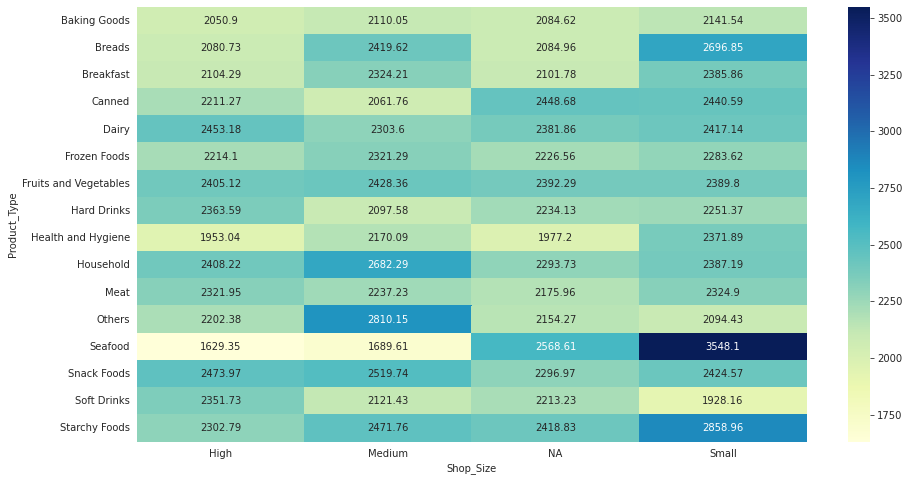

In [ ]:
# Treating NA values and then filling missing values
mask=data['Shop_Type']=='Supermarket Type1'
data.loc[mask,'Shop_Size']=data.loc[mask,'Shop_Size'].fillna('NA')
fig, ax = plt.subplots(figsize=(15, 8))
supermarket1frame=data[ data['Shop_Type']=='Supermarket Type1']
sns.heatmap(pd.crosstab(index=supermarket1frame['Product_Type'], columns=supermarket1frame['Shop_Size'],values=supermarket1frame['Shop_Outlet_Sales'],dropna=False,aggfunc=np.mean),
            cmap="YlGnBu", annot=True, cbar=True,ax=ax,fmt='g')

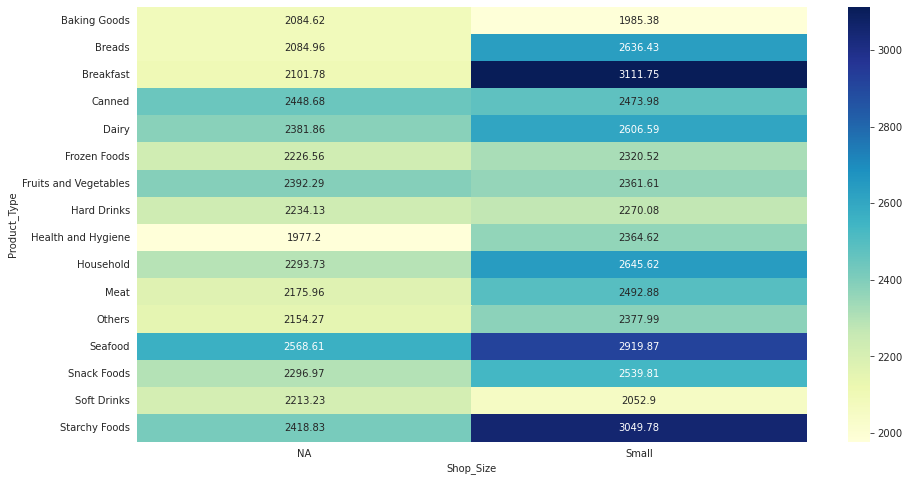

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
tier2market1frame=data[ data['Shop_Location_Type']=='Tier 2']
tier2table=pd.crosstab(index=tier2market1frame['Product_Type'], columns=tier2market1frame['Shop_Size'],values=tier2market1frame['Shop_Outlet_Sales'],dropna=False,aggfunc=np.mean)
sns.heatmap(tier2table,cmap="YlGnBu", annot=True, cbar=True,ax=ax,fmt='g')

**1.From the above analysis, "Supermarket Type1" in Tier 2 has 1855 missing Values in Shop Size</br>2.From the plot,it is not clear that NA and Small Shop have close resemblance</br>3. But NA Shop Values have close resemblance with High Shop size</br>4.Let us perform hypothesis Testing to conform on the same**

#####**3.1.2.c Hypothesis Testing to Support the Analysis**#####

In [ ]:
#For "Supermarket Type 1" , we will perform hypothesis Testing as shown below:
# Null Hypothesis : NA and High sized Shop's Sales  Mean are same

from scipy import stats
from statsmodels.stats import weightstats as stests
ztestframe1=supermarket1frame[supermarket1frame['Shop_Size']=='NA']
ztestframe3=supermarket1frame[supermarket1frame['Shop_Size']=='High']
ztest ,pval = stests.ztest(x1=ztestframe1['Shop_Outlet_Sales'], x2=ztestframe3['Shop_Outlet_Sales'], value=0,alternative='two-sided')
print(float(pval))
print(float(ztest))

if pval<0.05:
    print("Reject Null hypothesis : The average Sales of NA and High sized Shops  are same ")
else:
    print("Cannot Reject Null hypothesis :The average Sales of NA and High sized Shops are same ")

0.5926493680163571
-0.5350007075548241
Cannot Reject Null hypothesis :The average Sales of NA and High sized Shops are same 


In [ ]:
#For "Tier2" , we will perform hypothesis Testing as shown below:
# Null Hypothesis : NA and High sized Shop's Sales  Mean are same

from scipy import stats
from statsmodels.stats import weightstats as stests
ztestframe1=tier2market1frame[tier2market1frame['Shop_Size']=='NA']
ztestframe2=tier2market1frame[tier2market1frame['Shop_Size']=='Small']
ztest ,pval = stests.ztest(x1=ztestframe1['Shop_Outlet_Sales'], x2=ztestframe2['Shop_Outlet_Sales'], value=0,alternative='two-sided')
print(float(pval))
print(float(ztest))

if pval<0.05:
    print("Reject Null hypothesis : The average Sales of NA and Small sized Shops  are same ")
else:
    print("Cannot Reject Null hypothesis :The average Sales of NA and Small sized Shops are same ")




0.004714164195946884
-2.8259430677235704
Reject Null hypothesis : The average Sales of NA and Small sized Shops  are same 


#####**3.1.2.d Filling Missing Values for Type 1 Super Markets in Tier2 Location**#####

In [ ]:
# Imputing Missing Values for Supermarket Type1 type Shops in Tier 2 Location

print(f"{data[data['Shop_Type']=='Supermarket Type1'].Shop_Size.value_counts()}")

data.Shop_Size.replace("NA","High",inplace=True)

print(f"{data[data['Shop_Type']=='Supermarket Type1'].Shop_Size.value_counts()}")

Small     1860
NA        1855
High       932
Medium     930
Name: Shop_Size, dtype: int64
High      2787
Small     1860
Medium     930
Name: Shop_Size, dtype: int64


####**3.1.3 Imputing Missing Values for Product Weight**####

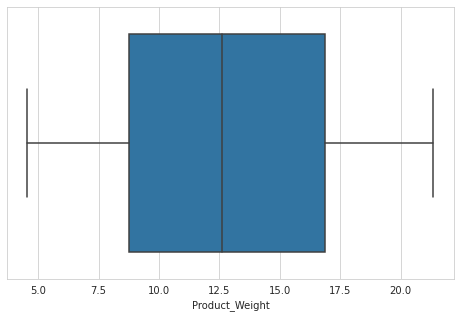

In [ ]:
# Before Imputing Product Weight , Box plot performed to see outliers
plt.figure(figsize=(8,5))
sns.boxplot('Product_Weight',data=data)

**There is no outliers, so we can impute the mean to na values**

In [ ]:
data['Product_Weight']= data['Product_Weight'].fillna(data['Product_Weight'].mean())

In [ ]:
missing_values = data['Product_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

Missing values: 0


###**3.2 Feature Engineering**###

####**3.2.1 Adding Product Category Column**####

In [ ]:
Featreengframe=data.copy()
Featreengframe['Product_Category']=Featreengframe['Sl.No'].apply(lambda x:x[0:2])
Featreengframe['Product_Category']=Featreengframe['Product_Category'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

####**3.2.2 Adding New Column Shoprunning Years**####

In [ ]:
Featreengframe['ShopRun_Years'] = 2021-Featreengframe['Shop_Establishment_Year']

####**3.2.3 Adding New Column IndividualUnitPrice**####

In [ ]:
Featreengframe['Price_Per_Unit_Weight'] = Featreengframe['Product_MRP']/Featreengframe['Product_Weight']

####**3.2.3 Adding New Column No.of_Units Sold**####

In [ ]:
Featreengframe['Units_sold'] = round(Featreengframe['Shop_Outlet_Sales']/Featreengframe['Price_Per_Unit_Weight'],0)

###**3.3 Deleting unnecessary Columns**###

In [ ]:
Featreengframe.nunique()

Sl.No                      1559
Product_Weight              416
Product_Fat_Content           5
Product_Visibility         7880
Product_Type                 16
Product_MRP                5938
Shop_Identifier              10
Shop_Establishment_Year       9
Shop_Size                     3
Shop_Location_Type            3
Shop_Type                     4
Shop_Outlet_Sales          3493
Product_Category              3
ShopRun_Years                 9
Price_Per_Unit_Weight      8080
Units_sold                  628
dtype: int64

In [ ]:
# Cleaning unnecessary columns based on unique values function and info function
Cleaneddata=Featreengframe.drop(['Sl.No'],axis=1,inplace=False)

###**3.4 Cleaning Missing Values and duplicate values**###

In [ ]:
# Finding out Columns having missing values (NA)
Cleaneddata.isna().sum()

Product_Weight             0
Product_Fat_Content        0
Product_Visibility         0
Product_Type               0
Product_MRP                0
Shop_Identifier            0
Shop_Establishment_Year    0
Shop_Size                  0
Shop_Location_Type         0
Shop_Type                  0
Shop_Outlet_Sales          0
Product_Category           0
ShopRun_Years              0
Price_Per_Unit_Weight      0
Units_sold                 0
dtype: int64

In [ ]:
# Deleting Duplicate Values
Renamedframe=Cleaneddata.drop_duplicates(inplace=False)

###**3.5 Updating Category Values**###

In [ ]:
Renamedframe.Product_Fat_Content.replace("LF","Low Fat",inplace=True)
Renamedframe.Product_Fat_Content.replace("low fat","Low Fat",inplace=True)
Renamedframe.Product_Fat_Content.replace("reg","Regular",inplace=True)


###**3.6 Renaming Column names**###

In [ ]:
Renamedframe.columns

Index(['Product_Weight', 'Product_Fat_Content', 'Product_Visibility',
       'Product_Type', 'Product_MRP', 'Shop_Identifier',
       'Shop_Establishment_Year', 'Shop_Size', 'Shop_Location_Type',
       'Shop_Type', 'Shop_Outlet_Sales', 'Product_Category', 'ShopRun_Years',
       'Price_Per_Unit_Weight', 'Units_sold'],
      dtype='object')

In [ ]:
# Renaming Columns

Renamedframe=Renamedframe.rename(columns={'Product_Weight':'PW', 'Product_Fat_Content':'PFC',
       'Product_Visibility':'PV', 'Product_Type':'PT',
       'Product_MRP':'PMRP', 'Shop_Identifier':'SI',
       'Shop_Establishment_Year':'SEY','Shop_Size':'SS', 'Shop_Location_Type':'SLT',
       'Shop_Type':'ST', 'Shop_Outlet_Sales':'SOS','ShopRun_Years':'SRY',
       'Price_Per_Unit_Weight':'PPUW','Units_sold':'US','Product_Category':'PC'},inplace=False)

##**4. EDA with Plots**##

###**4.1 Descriptive Statistics**###

In [ ]:
# Five point Summary for all Columns
Renamedframe.describe()

,PW,PV,PMRP,SEY,SOS,SRY,PPUW,US
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,23.168133,12.424336,197.986976
std,4.226124,0.051598,62.275067,8.371760,1706.499616,8.371760,7.585058,136.912520
min,4.555000,0.000000,31.290000,1985.000000,33.290000,12.000000,1.686016,5.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,17.000000,6.871897,91.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,22.000000,11.031752,173.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,34.000000,15.781936,283.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,36.000000,50.775731,826.000000


<b>Analysis of Descriptive Statistics:</br>
1. Product Weight : Average Weight purchased is 12.875,Mean=Median is 12.875 , so there will not be any skewness</br>
2. Product Visibility : Mean > Median , So Right skewness may occur and Minimum value is 0 which implies Product with zero visibility is purchased and has to be inspected </br>
3. Product MRP : Median > Mean, Left Skewness may occur. </br>
4. Shop Establishment Year & ShopRun_Years : Last Shop Established Year is 2009 and the oldest shop is established at 1985 </br>
5. Shop Outlet Sales : Mean > Median, Right Skewness may occur</br>
6. Price_Per_Unit_Weight : Mean price per Unit is 12.42 and is greater than Median . Right Skewness may occur</br>
7.Units Sold : Mean > Median . Right Skewness may Occur</b>

###**4.2 Analysing Distribution of Numeric Data Columns**###

####**4.2.1 Analyzing Target Variable Shop Outlet Sales**####

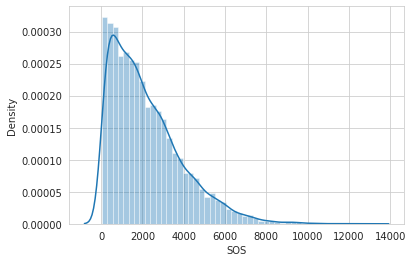

In [ ]:
sns.distplot(Renamedframe['SOS'])

<b>
* After analysing distplot, data is more concentrated before mean. </br>
* More over Mean > Median, hence Mean might be affected by Outlier </br>
* Hence boxplot is applied to anlyze the outlier</b>

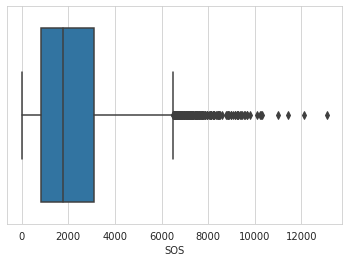

In [ ]:
sns.boxplot(Renamedframe['SOS'])

<b> Outlier is evident , hence it is subjected to outlier treatment</b>

In [ ]:
SOSOutlierremovedframe=pd.DataFrame()
dftemp=Renamedframe.copy()
Q1=dftemp.SOS.quantile(0.3)
Q3=dftemp.SOS.quantile(0.7)
IQR= Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dftemp=dftemp[(dftemp.SOS>lower_limit)&(dftemp.SOS<upper_limit)]
SOSOutlierremovedframe=pd.concat([SOSOutlierremovedframe,dftemp],ignore_index=True)

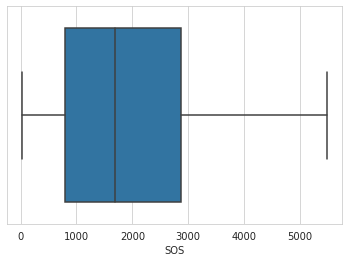

In [ ]:
sns.boxplot(SOSOutlierremovedframe['SOS'])

####**4.2.2 Analyzing Independent Variables**####

#####**4.2.2.1 Analyzing Product Visibility**#####

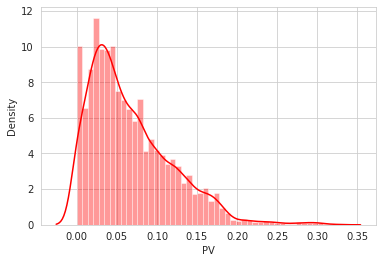

In [ ]:
sns.distplot(SOSOutlierremovedframe['PV'],color='red')

<b> 
* Mean is 0.066132 which is greater than  Median (0.053931) </br>
* Product with zero visibility & Outlier has to be inspected <b>

In [ ]:
index=SOSOutlierremovedframe.index
condition=SOSOutlierremovedframe['PV']==0
zeroPV_indices=index[condition]
zeroPVremovedframe=SOSOutlierremovedframe.drop(index=zeroPV_indices)

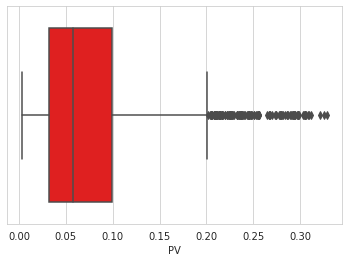

In [ ]:
sns.boxplot(zeroPVremovedframe['PV'],color='red')

In [ ]:
PVOutlierremovedframe=pd.DataFrame()
dftemp=zeroPVremovedframe.copy()
Q1=dftemp.PV.quantile(0.3)
Q3=dftemp.PV.quantile(0.7)
IQR= Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dftemp=dftemp[(dftemp.PV>lower_limit)&(dftemp.PV<upper_limit)]
PVOutlierremovedframe=pd.concat([PVOutlierremovedframe,dftemp],ignore_index=True)

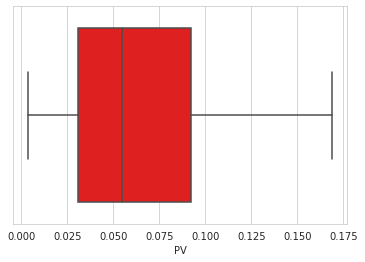

In [ ]:
sns.boxplot(PVOutlierremovedframe['PV'],color='red')

#####**4.2.2.1 Analyzing remaining numeric columns**#####

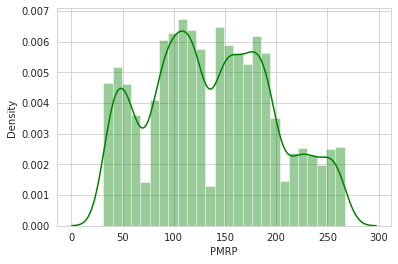

In [ ]:
sns.distplot(PVOutlierremovedframe['PMRP'],color='green')

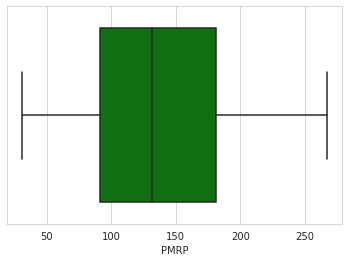

In [ ]:
sns.boxplot(PVOutlierremovedframe['PMRP'],color='green')

<b>
1.Product MRP has no Outlier . It has different peak may be due to different Product Types</br>
2.Product Weight has no Outlier </br>
3.Shop Establishment Year is a year data. Hence it will be left as such</b>

In [ ]:
OutlierremovedFrame=PVOutlierremovedframe.copy()

###**4.4 Analyzing Categorical Columns**###

####**4.4.1 Analyzing Product Fat Content**####

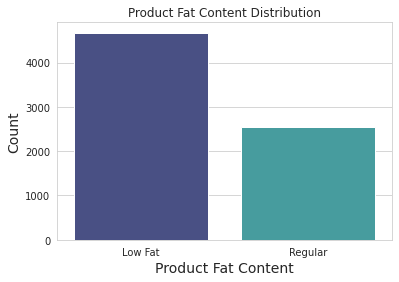

In [ ]:
sns.countplot(data=OutlierremovedFrame,x='PFC',palette='mako')
plt.title("Product Fat Content Distribution")
plt.xlabel("Product Fat Content",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

<b>Low Fat Foods are Contributed high in count compared to Regular Foods </b>

####**4.4.2 Analyzing Product Type**####

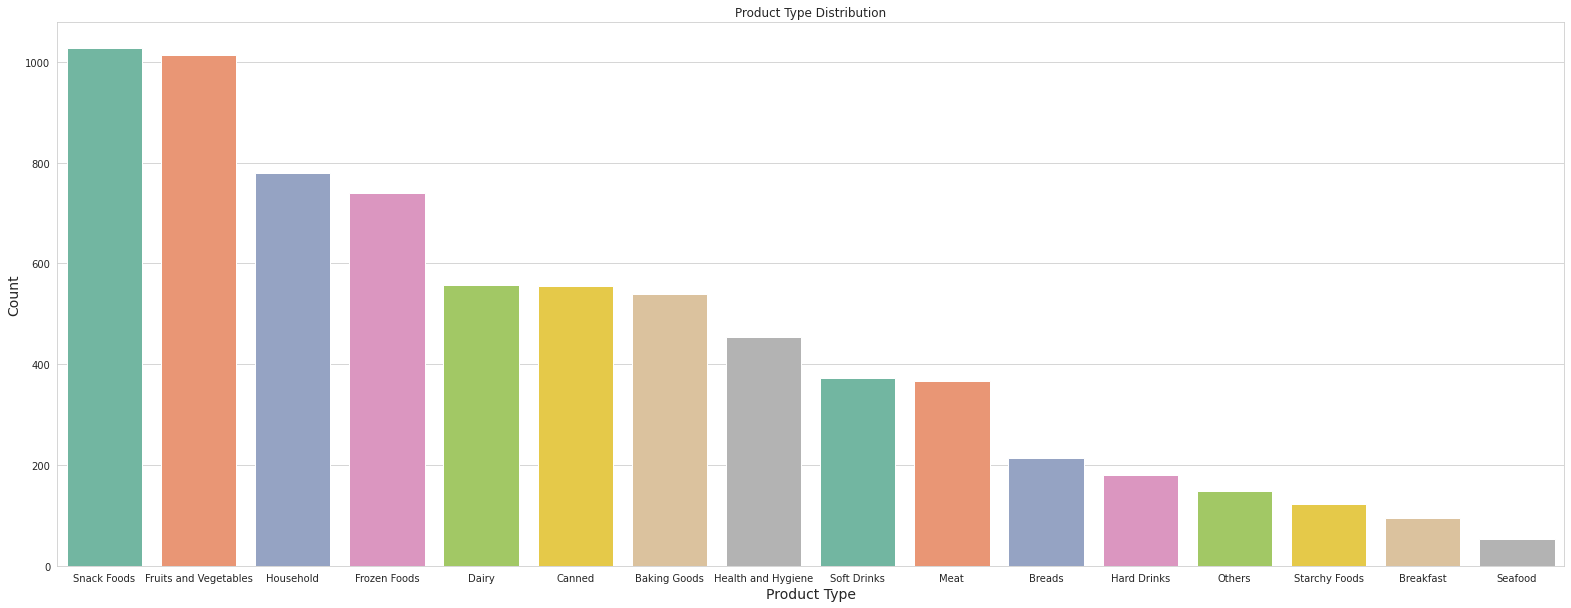

In [ ]:
plt.figure(figsize=(27,10))
sns.countplot(x='PT' , data=OutlierremovedFrame,order= OutlierremovedFrame['PT'].value_counts().index,palette='Set2',)
plt.title("Product Type Distribution")
plt.xlabel('Product Type', fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

<b>
1.Snack Foods is frequented more compared to all other Product types</br>
2.Seafood is least frequented when compared to all other Product Types</b>

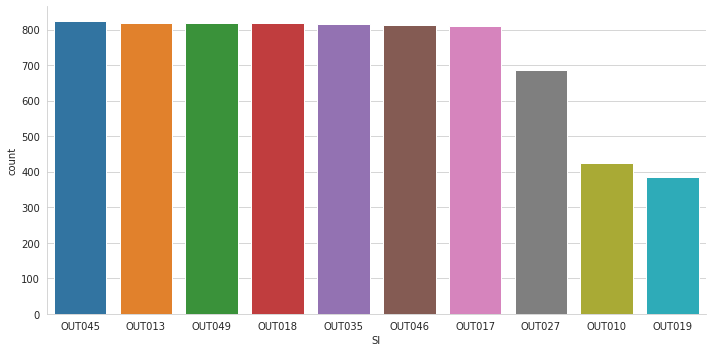

In [ ]:
sns.catplot('SI',kind = 'count',data = OutlierremovedFrame,aspect = 2,order= OutlierremovedFrame['SI'].value_counts().index)
plt.show()

<b>
1.'OUT045' is frequented more compared to all other Shop Identifier</br>
2.'OUT019' is least frequented when compared to all other Shop Identifier</b>

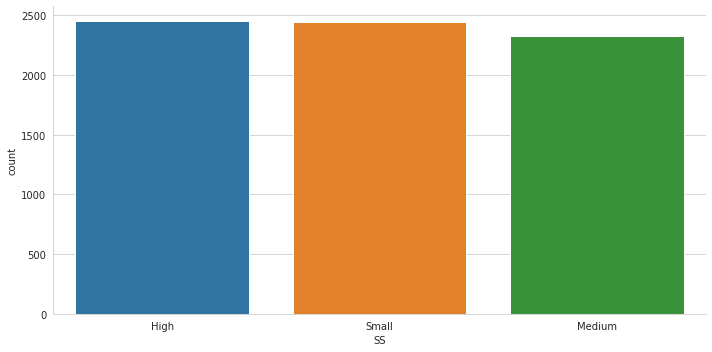

In [ ]:
sns.catplot('SS',kind = 'count',data = OutlierremovedFrame,aspect = 2,order= OutlierremovedFrame['SS'].value_counts().index)


<b>
1.'High' is frequented more compared to all other Shop Sizes</b>

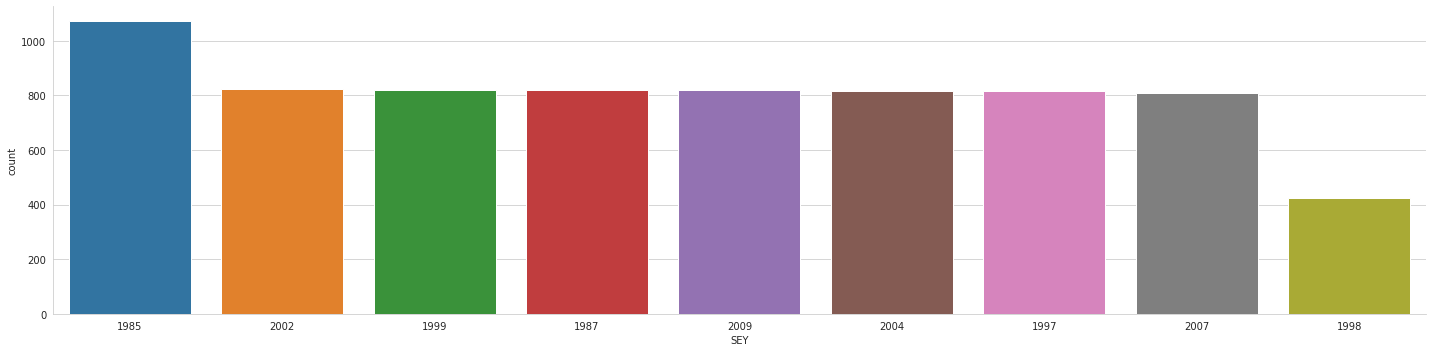

In [ ]:
sns.catplot('SEY',kind = 'count',data = OutlierremovedFrame,aspect =4,order= OutlierremovedFrame['SEY'].value_counts().index)

<b>More Shops are established at the Year '1985' and least shops are established at '1998'</b>

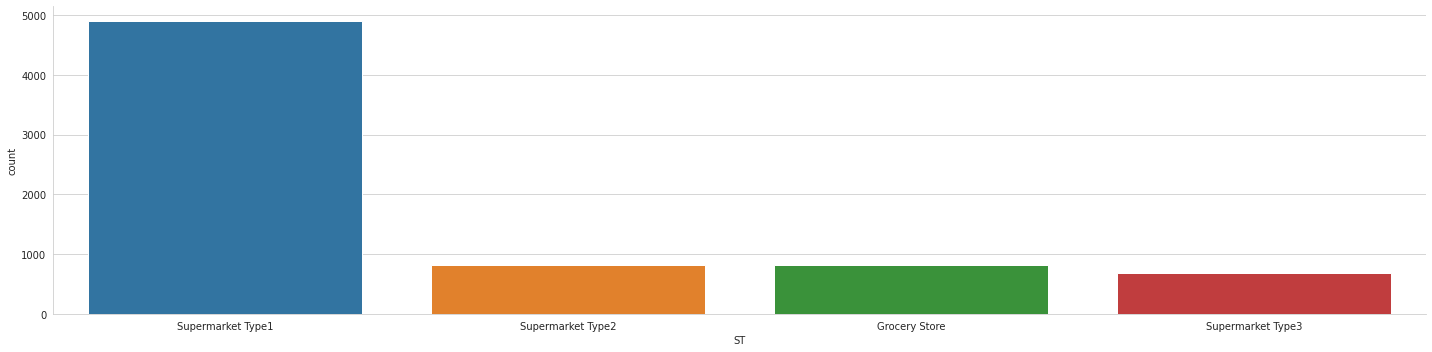

In [ ]:
sns.catplot('ST',kind = 'count',data = OutlierremovedFrame,aspect =4,order= OutlierremovedFrame['ST'].value_counts().index)

<b>
1."Super Market Type 1" has more transactions compared to all other Shop types </br>
2."Super Market Type 3" has least transactions compared to all other Shop Types</b>

###**4.5 Interrelationship between Numerical Variables**###

####**4.5.1 Correlation Matrix**####

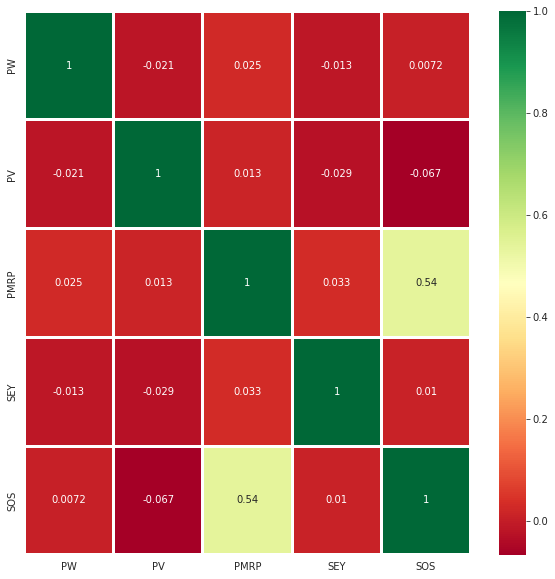

In [ ]:
numericcolumns=['PW','PV','PMRP','SEY','SOS'] # 'SRY', 'PPUW', 'US'
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(OutlierremovedFrame[numericcolumns].corr() ,annot=True,cmap='RdYlGn',linewidths=2,ax=ax)

<b> 
1.Correlation is done for the Numeric Columns provided in the Data Set</br>
2.Product MRP is having high correlation with Shop Outlet Sales</br>
3.Product Visibility is having negative Correlation with Shop Outlet Sales </b>

####**4.5.2 Target Variables Vs Independent Numeric Variables**####

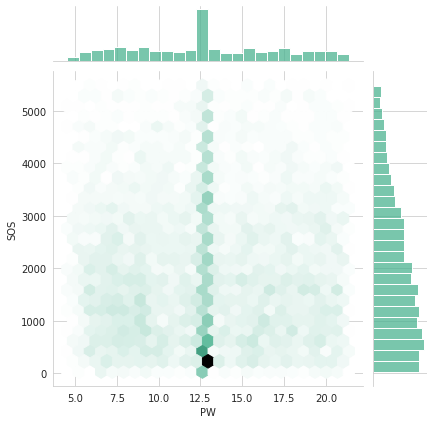

In [ ]:
#sns.hexbin(data=OutlierremovedFrame,x='PW',y='SOS',hue='PFC')
#ax=OutlierremovedFrame.plot.hexbin(x='SOS',y='PW',sharex=False,gridsize=30,figsize=(5,4))
#plt.show()

sns.jointplot(x=OutlierremovedFrame['PW'], y=OutlierremovedFrame['SOS'], kind="hex",color="#4CB391")


In [ ]:
pd.cut(OutlierremovedFrame['PW'],10).value_counts()

(11.273, 12.952]    1748
(6.234, 7.914]       761
(7.914, 9.594]       738
(14.632, 16.312]     648
(16.312, 17.991]     645
(17.991, 19.671]     592
(9.594, 11.273]      587
(12.952, 14.632]     550
(19.671, 21.35]      530
(4.538, 6.234]       419
Name: PW, dtype: int64

In [ ]:
analysisframe=OutlierremovedFrame[(OutlierremovedFrame['PW']>12.5) & (OutlierremovedFrame['PW']<13.0)]
pd.cut(analysisframe['SOS'],10).value_counts()


(28.512, 578.38]        361
(578.38, 1122.805]      145
(2756.079, 3300.504]    107
(1122.805, 1667.23]     104
(2211.654, 2756.079]    101
(3300.504, 3844.928]     99
(1667.23, 2211.654]      97
(3844.928, 4389.353]     81
(4389.353, 4933.778]     71
(4933.778, 5478.202]     55
Name: SOS, dtype: int64

<b>From the above plots and Frequency table, we could infer below: </br>
1.Most of the Products have Product Weight ranges from 11.273 - 12.952</br>
2.For the above Product Weight range, we could see Maximum Sale range is 28.512 - 578.38
</b>

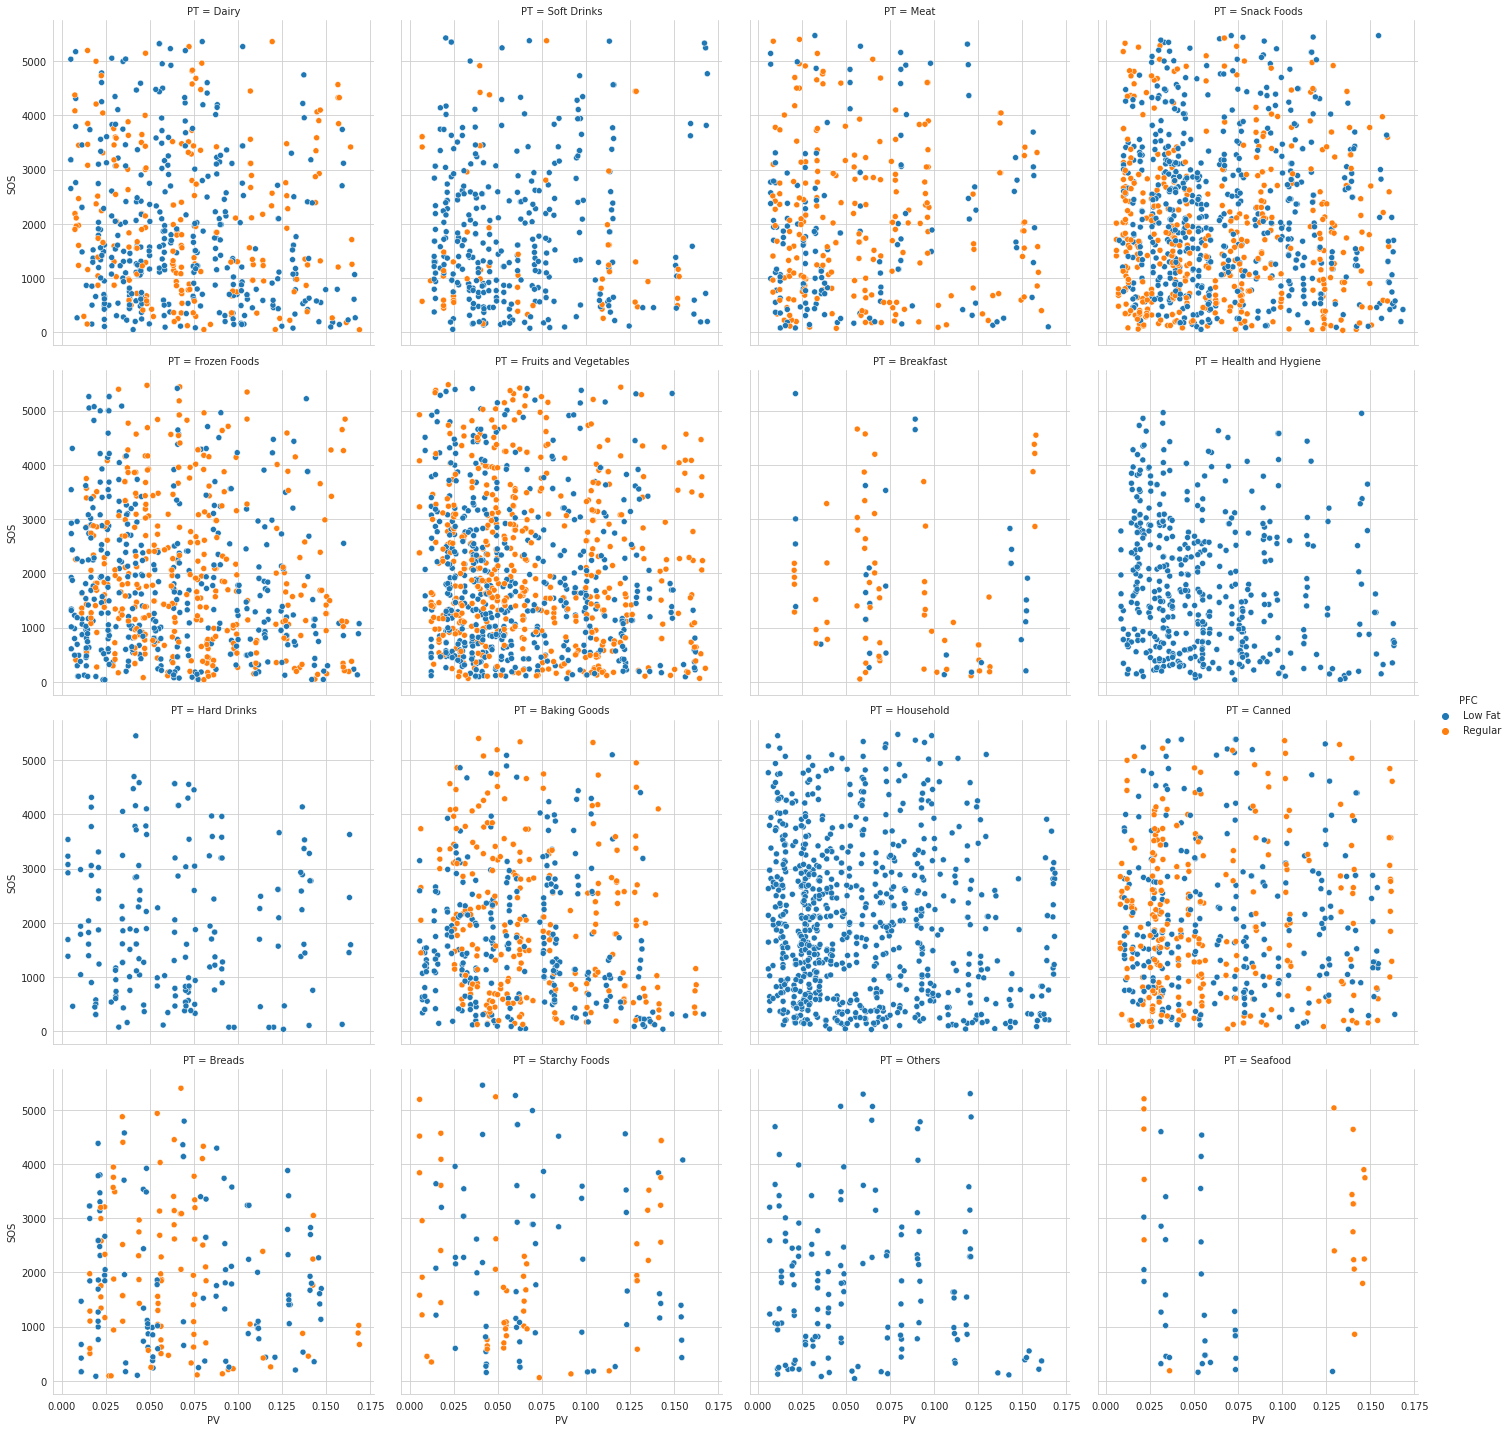

In [ ]:
sns.relplot(
    data=OutlierremovedFrame,
    x='PV',
    y='SOS',
    col='PT',
    hue='PFC',
    kind='scatter',
    col_wrap=4
    

)

<b>Please find the inference below:</br>
1.For lower Product Visibility, Sales seems to be high </br>
2.For higher Product Visbility, Sales seems to be low </br>
3.It is also seen that Product Visibility has negative Correlation</br>
4.For Regular Fat Content , Higher Visibility of Some Product Types results in higher Sales such as "Seafood, Canned Food, Breakfast" </b>

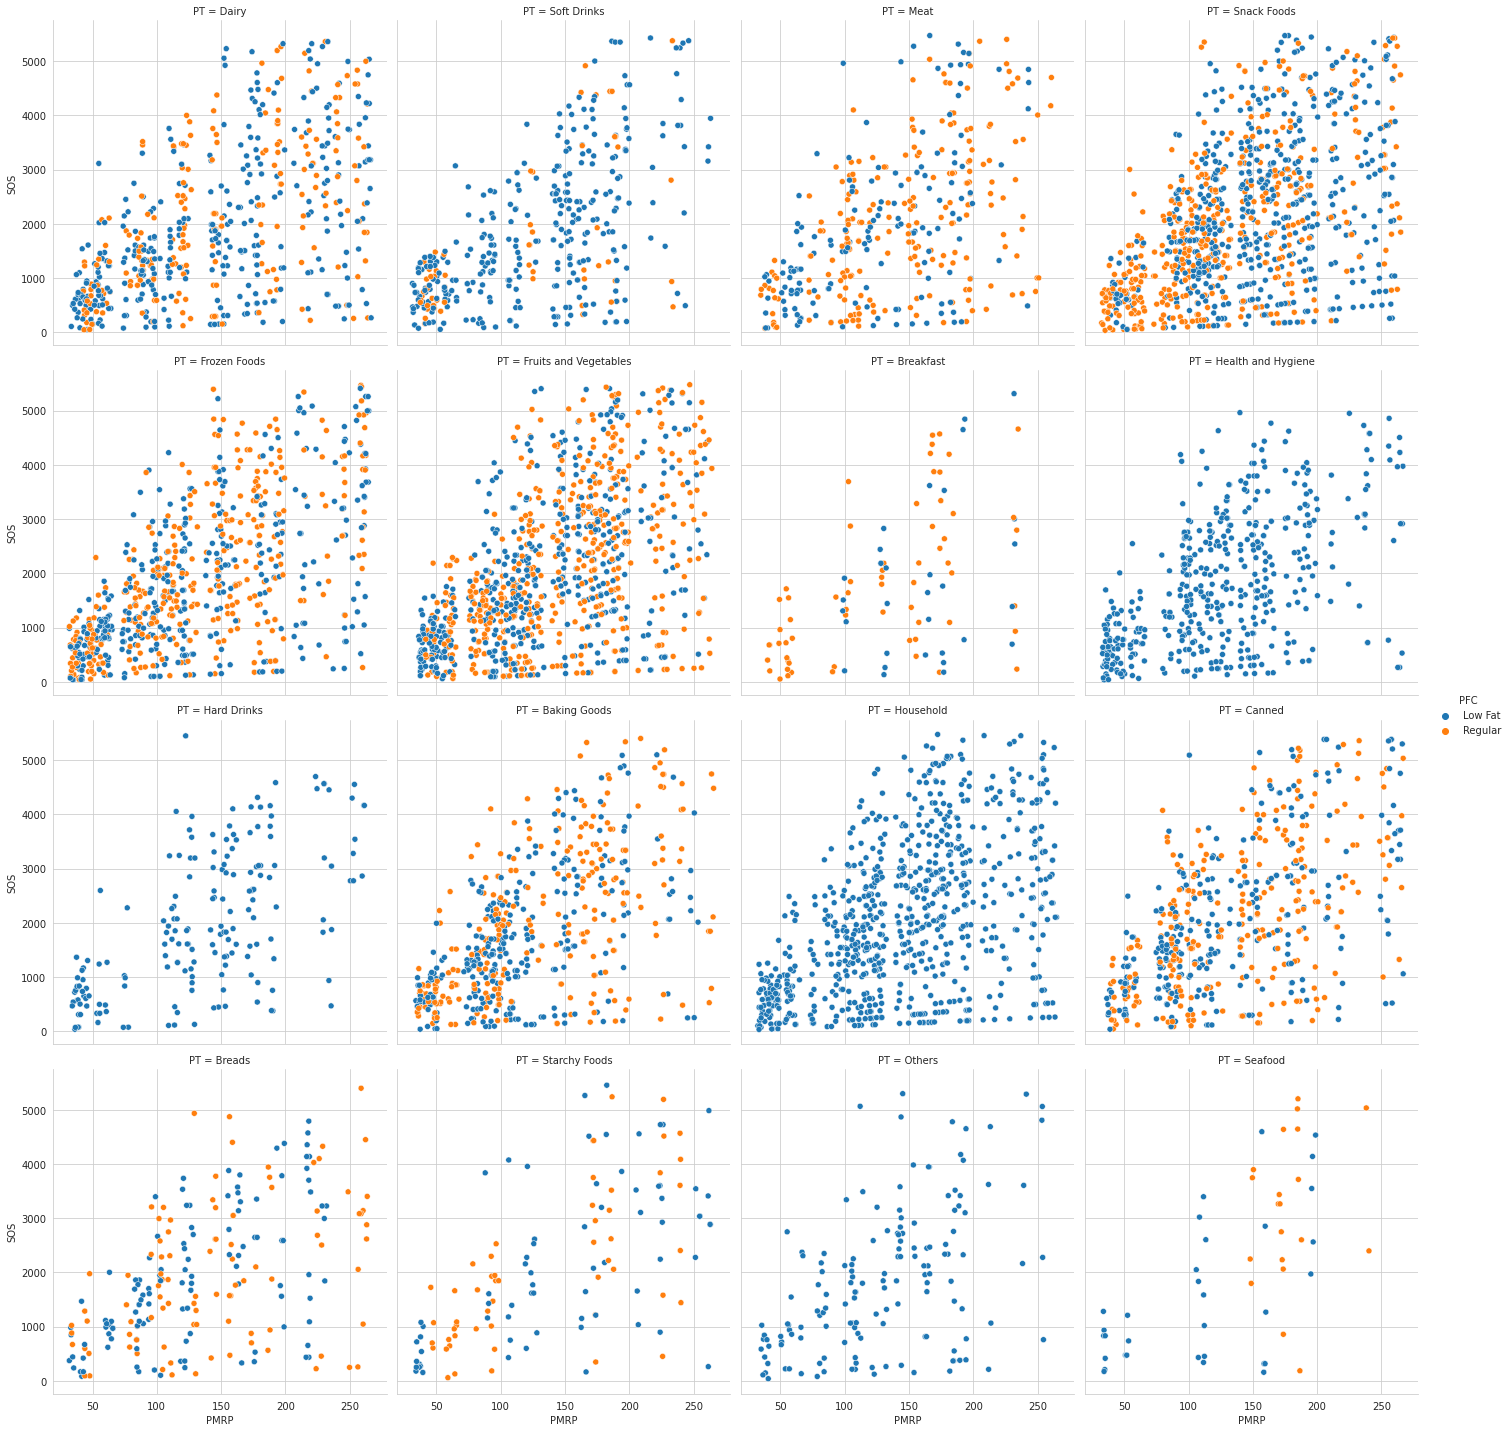

In [ ]:
sns.relplot(
    data=OutlierremovedFrame,
    x='PMRP',
    y='SOS',
    col='PT',
    hue='PFC',
    kind='scatter',
    col_wrap=4

)



<b> 1.When Product Sales increases,Shop Outlet Sales increases. It is also evident as it has positive correlation
2.For Low Fat content , below is infered:</br>
a. Dairy,Soft Drinks,Household and Fruits & Vegetables products having low MRP resulting in Sales less than 1000 is observed more
b.'Household' Product types with low and Medium Product MRP seems to have more Sales 
3.For Regular Fat content , below is infered:</br>
a. "Snack Foods,Frozen food" products having low MRP resulting in Sales less than 1000 is observed more
b.'Dairy,Snack Foods,Meat,Fruits and Vegetables, Baking Goods, Canned Foods' Product types with low and Medium Product MRP seems to have more Sales</b>

####**4.5.3 Target Variables Vs Independent Category Variables**####

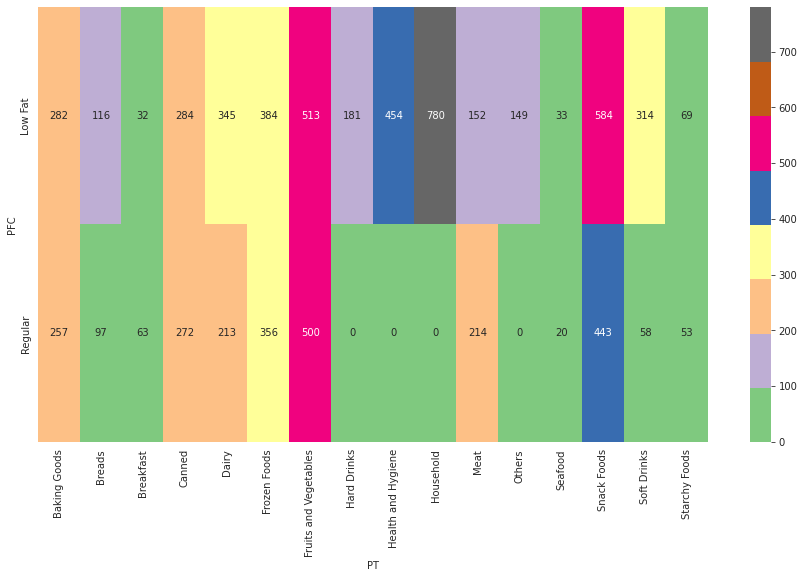

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pd.crosstab(index=OutlierremovedFrame['PFC'],columns=OutlierremovedFrame['PT'],normalize=False),
            cmap="Accent", annot=True, cbar=True,ax=ax,fmt='d')
plt.show()

**1.Low Fat Content products are more than Regular Fat content Products**

**2."Fruits and Vegetables & Snack Foods" are the top 2 contributing Product types**

**3.Product Type such as "Household,Health & Hygiene,Hard Drink and Others"- have only Low Fat Content Products**

**4.Product Type such as "Baking Goods,Breakfast and Meat"- have more Regular Fat Products compared to Low Fat Content products**


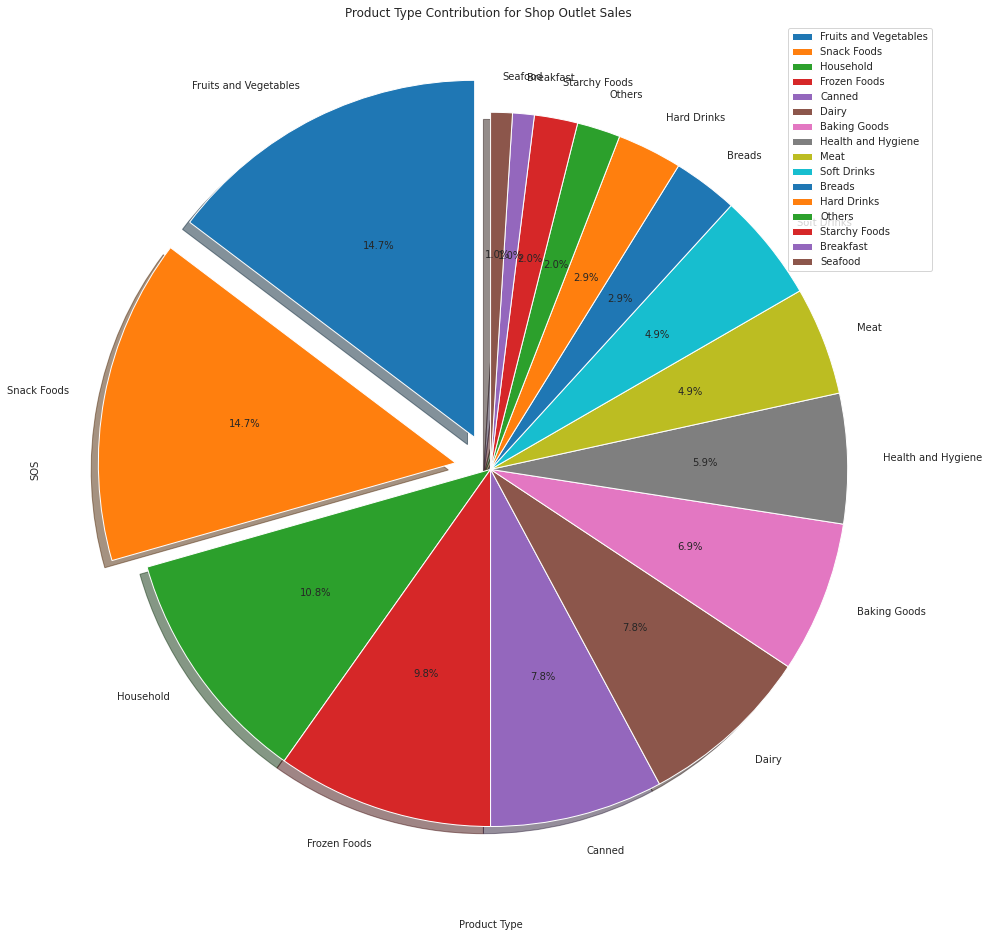

In [ ]:
labels='Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Canned','Dairy','Baking Goods','Health and Hygiene','Meat','Soft Drinks','Breads','Hard Drinks','Others','Starchy Foods','Breakfast','Seafood'
explode=(0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
OutlierremovedFrame.groupby(["PT"])\
.agg({"SOS" : "sum"})[["SOS"]]\
.apply(lambda x: round(100*x/x.sum(),0))\
.sort_values(by="SOS", ascending=False)\
.plot.pie(explode=explode,label=labels,autopct='%1.1f%%',shadow=True,startangle=90,figsize=(16,20),subplots=True)
plt.title('Product Type Contribution for Shop Outlet Sales ')
plt.xlabel('Product Type')
plt.show()

<b> Below is infered from above Pie Chart:</br>

1."Fruits and Vegetables & Snacks" seems to be high contributer to the sales </br>

2."Household, Frozen Foods, Canned Foods and Dairy" seems to be Moderate Contributer to the Sales

3."Seafoods,Breakfast,Starchy foods" seems to be least contributer to the Sales
 </b>

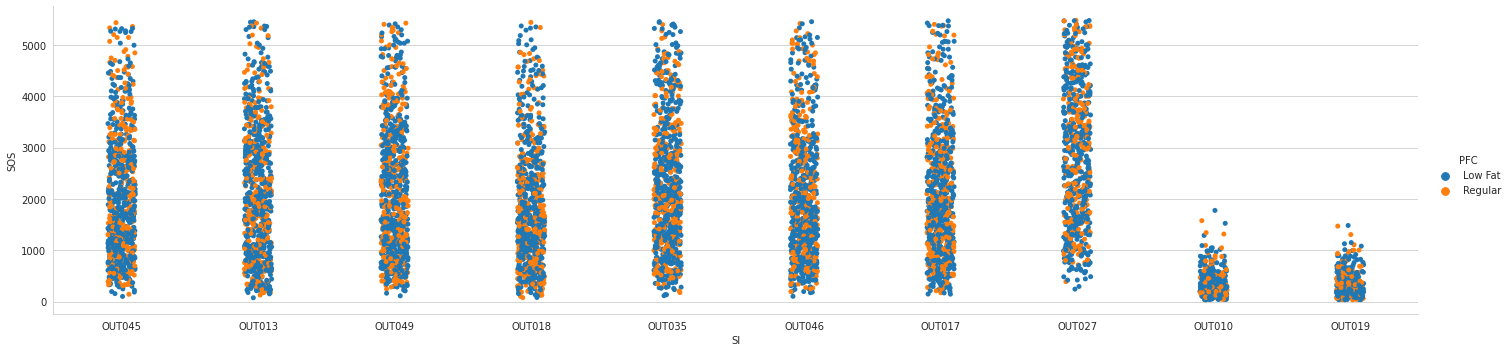

In [ ]:
sns.catplot(data=OutlierremovedFrame,x='SI',y='SOS',hue='PFC',height=5,aspect=4,order= OutlierremovedFrame['SI'].value_counts().index)
plt.show()

<b>1."OUT019" is the least Contributer to the Sales</br>
2.Low Fat Content Seems to be more Prominent in Sales Value below 2000 in almost all Shop Identifiers </br>
3.Regular Fat Content seems to be have high Sale value in "OUT045" and "OUT046" </b>

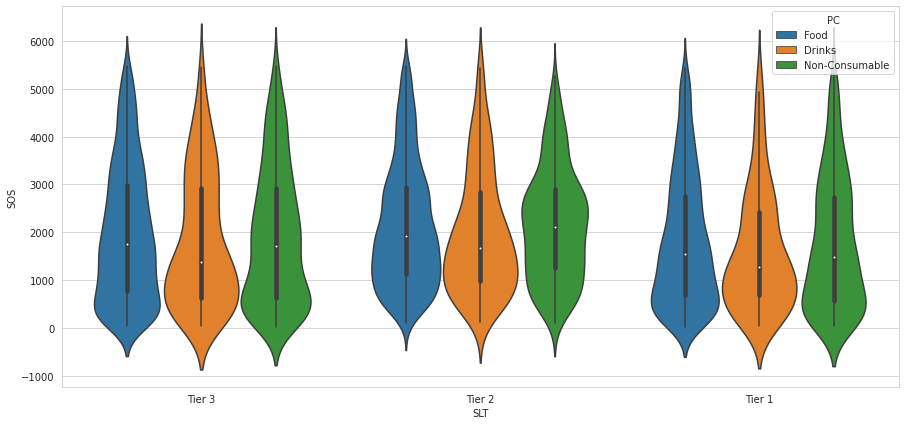

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.violinplot(x ="SLT", y = "SOS", data = OutlierremovedFrame,hue='PC',order= OutlierremovedFrame['SLT'].value_counts().index,gridsize=300, width=0.8,ax=ax);
plt.show()

<b>It seems Sales for all Location types almost concentrated below 2000</b>

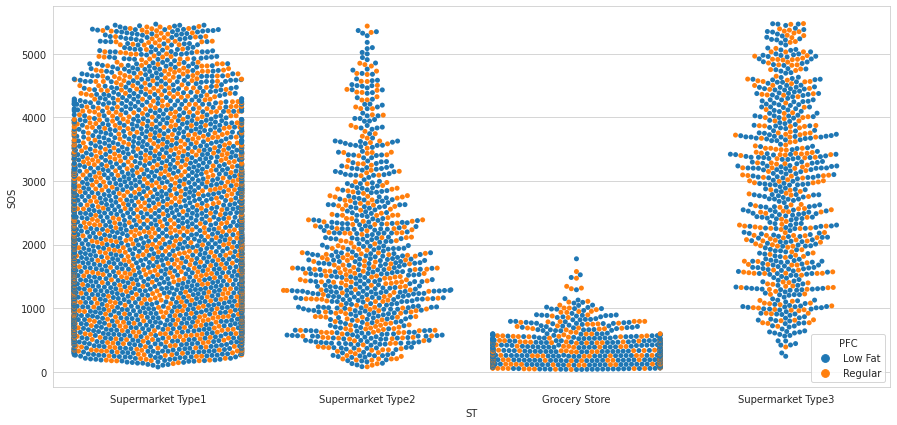

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.swarmplot(data=OutlierremovedFrame,x='ST',y='SOS',hue='PFC',ax=ax,order= OutlierremovedFrame['ST'].value_counts().index)
plt.show()

<b>
1."Supermarket Type1 " have more products with sale Value below 4000 </br>
2."Supermarket Type2" have more products with sale Value between 500 and 2500</br>
3."Grocery Store" have more products with sale value below 1000</br>
4."Supermarket Type3" has more products above sale value 3000</b>

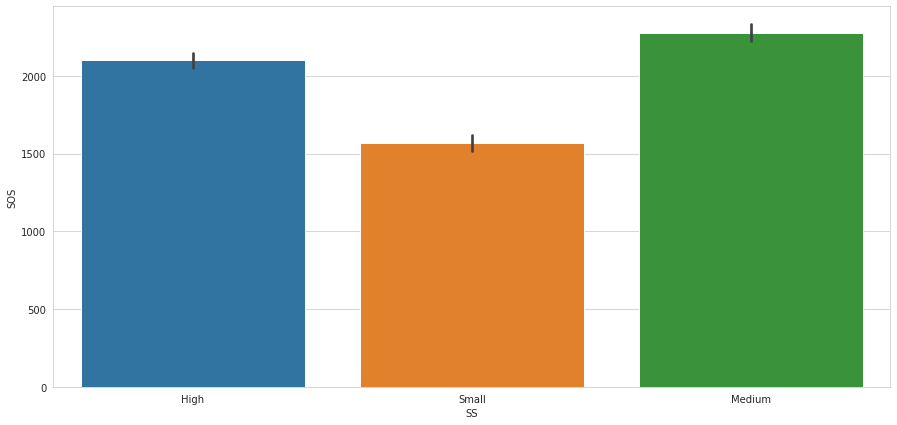

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=OutlierremovedFrame,x='SS',y='SOS',order= OutlierremovedFrame['SS'].value_counts().index,ax=ax)
plt.show()

<b>Medium Shops contribute more to Sales and Small Shops seems to be least Contributor</b>

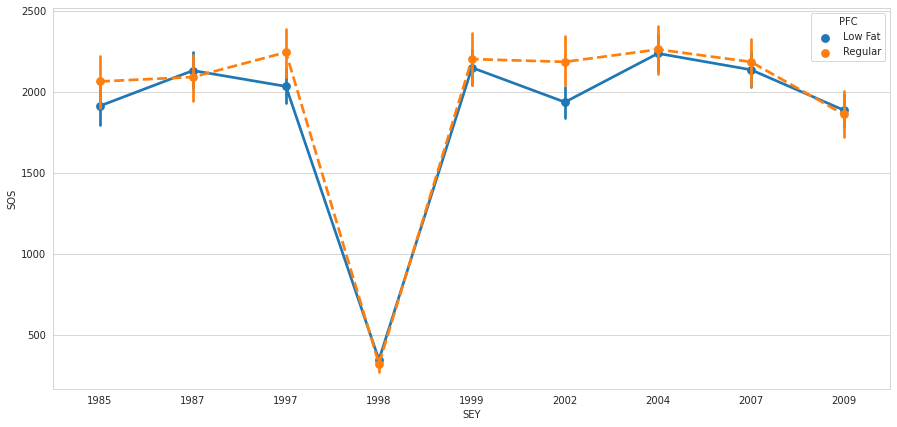

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.pointplot(x = "SEY", y = "SOS", hue='PFC' ,linestyles = ["-", "--"], data= OutlierremovedFrame,ax=ax)
plt.show()


<b>Shop established at 1998 have least Sales compared to the Shop established remaining Years</b>

##**5.Encoding**##

###**5.1 Ordinal Encoding**###

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
Categoryencodedframe=OutlierremovedFrame.copy()

oe=OrdinalEncoder(categories=[['Small','Medium','High'],['Tier 1','Tier 2','Tier 3'],['Grocery Store','Supermarket Type2','Supermarket Type3','Supermarket Type1']])

Categoryencodedframe[['SS','SLT','ST']]=oe.fit_transform(Categoryencodedframe[['SS','SLT','ST']])


###**5.2 Zero Hot Encoding**###

In [ ]:
#Converting Zero encoded columns 
Categoryencodedframe = pd.get_dummies(Categoryencodedframe, columns=['PT','SI'],drop_first=True)


###**5.3 Label Encoding**###

In [ ]:
# Applying label encoding for other categorical columns

label_columns=['PFC','PC']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in label_columns:
    Categoryencodedframe[i] = le.fit_transform(Categoryencodedframe[i])

##**6. Deleting Columns for Preprocessing**##

In [ ]:
Categoryencodedframe.columns

Index(['PW', 'PFC', 'PV', 'PMRP', 'SEY', 'SS', 'SLT', 'ST', 'SOS', 'PC', 'SRY',
       'PPUW', 'US', 'PT_Breads', 'PT_Breakfast', 'PT_Canned', 'PT_Dairy',
       'PT_Frozen Foods', 'PT_Fruits and Vegetables', 'PT_Hard Drinks',
       'PT_Health and Hygiene', 'PT_Household', 'PT_Meat', 'PT_Others',
       'PT_Seafood', 'PT_Snack Foods', 'PT_Soft Drinks', 'PT_Starchy Foods',
       'SI_OUT013', 'SI_OUT017', 'SI_OUT018', 'SI_OUT019', 'SI_OUT027',
       'SI_OUT035', 'SI_OUT045', 'SI_OUT046', 'SI_OUT049'],
      dtype='object')

In [ ]:
mldata=Categoryencodedframe.drop(['SEY'],axis=1,inplace=False)

In [ ]:
mldata=mldata.drop(['PMRP'],axis=1,inplace=False)

##**7.Splitting the data**##

In [ ]:
#Importing Package for Test train splitup
from sklearn.model_selection import train_test_split

In [ ]:
mldata.columns

Index(['PW', 'PFC', 'PV', 'SS', 'SLT', 'ST', 'SOS', 'PC', 'SRY', 'PPUW', 'US',
       'PT_Breads', 'PT_Breakfast', 'PT_Canned', 'PT_Dairy', 'PT_Frozen Foods',
       'PT_Fruits and Vegetables', 'PT_Hard Drinks', 'PT_Health and Hygiene',
       'PT_Household', 'PT_Meat', 'PT_Others', 'PT_Seafood', 'PT_Snack Foods',
       'PT_Soft Drinks', 'PT_Starchy Foods', 'SI_OUT013', 'SI_OUT017',
       'SI_OUT018', 'SI_OUT019', 'SI_OUT027', 'SI_OUT035', 'SI_OUT045',
       'SI_OUT046', 'SI_OUT049'],
      dtype='object')

In [ ]:
X=mldata.loc[:,['PW', 'PFC', 'PV', 'SS', 'SLT', 'ST', 'PC', 'SRY', 'PPUW', 'US',
       'PT_Breads', 'PT_Breakfast', 'PT_Canned', 'PT_Dairy', 'PT_Frozen Foods',
       'PT_Fruits and Vegetables', 'PT_Hard Drinks', 'PT_Health and Hygiene',
       'PT_Household', 'PT_Meat', 'PT_Others', 'PT_Seafood', 'PT_Snack Foods',
       'PT_Soft Drinks', 'PT_Starchy Foods', 'SI_OUT013', 'SI_OUT017',
       'SI_OUT018', 'SI_OUT019', 'SI_OUT027', 'SI_OUT035', 'SI_OUT045',
       'SI_OUT046', 'SI_OUT049']]
y= mldata['SOS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(f"The X_train is :{X_train.shape}\nThe y_train is :{y_train.shape}\nThe X_test is :{X_test.shape}\nThe y_test is :{y_test.shape}")

The X_train is :(5052, 34)
The y_train is :(5052,)
The X_test is :(2166, 34)
The y_test is :(2166,)


##**8.Metrics Definition**##

In [ ]:
#Importing Packages for Metrics and Cross Validation
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [ ]:
#Metrics definition
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('__________________________________')
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    return r2_square

##**9.Model Building&Evaluation**##

###**9.1 Basic Model**###

####**9.1.1 Basic Model Building**####

In [ ]:
#Importing Package for LinearRegression
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
# Fitting Multiple Linear Regression to the training set 
basicregressor = LinearRegression()
basicmodel=basicregressor.fit(X_train, y_train)
#Regression Coefficient
coeff_df = pd.DataFrame(basicregressor.coef_, X_train.columns, columns=['Basic_Regression_Coefficient'])

####**9.1.2 Basic Prediction**####  

In [ ]:
# Output Prediction
y_basic_pred = basicregressor.predict(X_test)
OutputTargetforTest=pd.DataFrame()
OutputTargetforTest['Actual_Y_Value']=pd.Series(y_test)
OutputTargetforTest.reset_index(inplace=True,drop=True)
OutputTargetforTest['Basic_Predicted_Y_Value']=list(y_basic_pred)

####**9.1.3 Basic Model Evalution**####

In [ ]:
basic_R2_Score=print_evaluate(y_test,y_basic_pred)
#Cross Validation Evaluation
basiccvscore=cross_val_score(basicmodel, X_test, y_test,scoring='r2', cv=10)
print(basiccvscore)
print(f"Mean CV_Score for Basic Model is : {np.mean(basiccvscore)}")



__________________________________
MAE: 465.79727372237807
MSE: 429499.2430154414
RMSE: 655.3619175809969
R2 Square 0.7620749634361488
__________________________________
[0.73508525 0.81579515 0.74203625 0.73116709 0.78727046 0.75113184
 0.79280045 0.72293612 0.72834109 0.76307931]
Mean CV_Score for Basic Model is : 0.756964302198467


###**9.2 Normalized Model**###

In [ ]:
#Importing the Packages for Normalizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler

####**9.2.1 Normalised Model Building**####

In [ ]:
# Normalizing X
normal_scaler=MinMaxScaler()
X_normaltrain=X_train.copy()
X_normaltest=X_test.copy()
numeric_cols = ['PW', 'PV', 'SRY','PPUW','US']

X_normaltrain[numeric_cols] = normal_scaler.fit_transform(X_train[numeric_cols])

X_normaltest[numeric_cols] = normal_scaler.fit_transform(X_test[numeric_cols])

In [ ]:
# Creating Regression Model for Normalized X
normalizedregressor = LinearRegression()
normalmodel=normalizedregressor.fit(X_normaltrain, y_train)
#Regression Coefficient
coeff_df['Normalized_Regression_Coefficient'] = list(normalizedregressor.coef_)

####**9.2.2 Normalized Model Prediction**####

In [ ]:
y_normal_pred=normalizedregressor.predict(X_normaltest)
OutputTargetforTest['Normal_Predicted_Y_Value']=list(y_normal_pred)

####**9.2.3 Normalized Model Evaluation**####

In [ ]:
Normal_R2_score=print_evaluate(y_test,y_normal_pred)
#Cross Validation Evaluation
normal_cvscore=cross_val_score(normalmodel,X_normaltest,y_test,scoring='r2', cv=6)
print(normal_cvscore)
print(f"Mean CV_Score for Normal Model is : {np.mean(normal_cvscore)}")

__________________________________
MAE: 464.9410369575254
MSE: 444655.5288582524
RMSE: 666.8249611841569
R2 Square 0.7536790001790183
__________________________________
[0.7649729  0.77684029 0.73787024 0.77023113 0.74037585 0.74845651]
Mean CV_Score for Normal Model is : 0.7564578193463097


###**9.3.Standardized Model**###

####**9.3.1 Standardized Model Building**####

In [ ]:
# Importing library for Standard Scaler
from sklearn.preprocessing import StandardScaler

####**9.3.2 Standardized Model Building**####

In [ ]:
#Standardizing X 

standard_scaler=StandardScaler()
X_standard_train=X_train.copy()
X_standard_test=X_test.copy()
numeric_cols = ['PW', 'PV', 'SRY','PPUW','US']

X_standard_train[numeric_cols] = standard_scaler.fit_transform(X_train[numeric_cols])

X_standard_test[numeric_cols] = standard_scaler.fit_transform(X_test[numeric_cols])

In [ ]:
# Creating Regression Model for Standardized X
Standardregressor = LinearRegression()
Standardregressor.fit(X_standard_train, y_train)
#Regression Coefficient
coeff_df['standard_Regression_Coefficient'] = list(Standardregressor.coef_)

####**9.3.3 Standardized Model Prediction**####

In [ ]:
y_standard_pred=Standardregressor.predict(X_standard_test)
OutputTargetforTest['Standard_Predicted_Y_Value']=list(y_standard_pred)

####**9.3.4 Standardized Model Evalution**####

In [ ]:
Standard_R2_score=print_evaluate(y_test,y_standard_pred)
#Cross Validation Evaluation
standard_cv_score=cross_val_score(Standardregressor, X_standard_test, y_test, scoring='r2', cv=5)
print(standard_cv_score)
print(f"Mean CV_Score for Standard Model is : {np.mean(standard_cv_score)}")

__________________________________
MAE: 472.9705739006143
MSE: 432505.5814010724
RMSE: 657.6515653452612
R2 Square 0.760409574772591
__________________________________
[0.77702882 0.73713369 0.76787421 0.75297029 0.74441974]
Mean CV_Score for Standard Model is : 0.7558853493482314


###**9.4. PowerModel with Standardization**###

####**9.4.1 Power Model with Standardization Building**####

In [ ]:
#Importing libraries for Power Transformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
# power transform the raw data
pwdy_train=pd.DataFrame(y_train)
power = PowerTransformer(method='box-cox', standardize=True)
df_std_y = pd.DataFrame(power.fit_transform(pwdy_train), columns=pwdy_train.columns)
pwld=power.lambdas_

from scipy.special import boxcox, inv_boxcox
#use lambdas_ value
y_transform_train = boxcox(pwdy_train, pwld)

In [ ]:
# Creating Regression Model for Power Transformed Y and Standardized X
PowerRegressor = LinearRegression()
PowerRegressor.fit(X_normaltrain, y_transform_train)
#Regression Coefficient
coeff_df['PowerTransformer_Regression_Coefficient'] = list(PowerRegressor.coef_[0])

####**9.4.2 Power Model Prediction**####

In [ ]:
# Predicting the y value for Power Model with Standardized Input
y_power_model_transpred=PowerRegressor.predict(X_normaltest)
# Inversing the Prediction values
y_power_model_pred=inv_boxcox(y_power_model_transpred, pwld)
y_power_model_pred_final=y_power_model_pred.flatten()
OutputTargetforTest['PowerModel_Predicted_Y_Value']=list(y_power_model_pred_final)

####**9.4.3 Power Model Evaluation**####

In [ ]:
Powermodel_R2_score=print_evaluate(y_test,y_power_model_pred)
#Calculating CV Score
pwtws_cv_score=cross_val_score(PowerRegressor, X_normaltest, y_test, scoring='r2', cv=5)
print(pwtws_cv_score)
print(f"Mean CV_Score for Power Model is : {np.mean(pwtws_cv_score)}")

__________________________________
MAE: 450.12475057278886
MSE: 468234.7242283021
RMSE: 684.2767891930151
R2 Square 0.7406170891004846
__________________________________
[0.77702602 0.73713369 0.76786587 0.75299766 0.74441974]
Mean CV_Score for Power Model is : 0.7558885949726308


###**9.5. Grid Search Model**###

####**9.5.1 Grid Search Model Building**####

In [ ]:
#Import the libraries
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 45))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
cvmodel=model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


####**9.5.2 Grid Search Model Prediction**#### 

In [ ]:
y_gridsearchprediction = cvmodel.predict(X_test)
#Calculating CV Score
OutputTargetforTest['Grid Search_PredictedYvalue']=list(y_gridsearchprediction)

####**9.5.3 Grid Search Model Evaluation**#### 

In [ ]:
Gridsearch_R2_score=print_evaluate(y_test,y_gridsearchprediction)
#Calculating CV Score
Gridsearch_cv_score=cross_val_score(Standardregressor, X_standard_test, y_test, scoring='r2', cv=5)
print(Gridsearch_cv_score)
print(f"Mean CV_Score for Grid Search Model is : {np.mean(Gridsearch_cv_score)}")

__________________________________
MAE: 465.7652395081781
MSE: 429481.06598795543
RMSE: 655.348049503434
R2 Square 0.7620850327668858
__________________________________
[0.77702882 0.73713369 0.76787421 0.75297029 0.74441974]
Mean CV_Score for Grid Search Model is : 0.7558853493482314


###**9.6. Best Subset Regression**###

####**9.6.1 Importing Libraries**####

In [ ]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression


%matplotlib inline
plt.style.use('ggplot')

####**9.6.2 Feature Selection**####

In [ ]:
for i in range(12,25):
  X_reg_new=SelectKBest(score_func=f_regression, k=i).fit_transform(X_train,y_train)
  model_k = linear_model.LinearRegression(fit_intercept = True)
  model_k.fit(X_reg_new,y_train)
  RSS = mean_squared_error(y_train,model_k.predict(X_reg_new)) * len(y_train)
  R_squared = model_k.score(X_reg_new,y_train)
  print(i,R_squared)

12 0.7578936135986236
13 0.7578936135986236
14 0.7579272343376688
15 0.758032343307899
16 0.7580595733056958
17 0.7581283016032092
18 0.7582648458915797
19 0.7582816013543738
20 0.7583219160951509
21 0.7583219160951509
22 0.7583454257293407
23 0.7585478082138193
24 0.7587323997346156


####**9.6.3  Building Model with Best Features**####

In [ ]:
X_reg_new=SelectKBest(score_func=f_regression, k=24).fit_transform(X,y)
X_train,X_test,y_train,y_test=train_test_split(X_reg_new,y,test_size=0.3,random_state=42)
model_k = linear_model.LinearRegression(fit_intercept = True)
model_k.fit(X_train,y_train)
 

LinearRegression()

####**9.6.3  Model Prediction**####

In [ ]:
# Output Prediction
y_kbestpred = model_k.predict(X_test)

OutputTargetforTest['KBest_Predicted_Y_Value']=list(y_kbestpred)

####**9.6.4  Model Evaluation**####

In [ ]:
kbest_r2score=print_evaluate(y_test,y_kbestpred)
#Cross Validation Evaluation
kbest_cv_score=cross_val_score(model_k, X_test, y_test, scoring='r2', cv=5)
print(kbest_cv_score)
print(f"Mean CV_Score for Best Subset Model is : {np.mean(kbest_cv_score)}")

__________________________________
MAE: 462.9317381439767
MSE: 429457.75149102346
RMSE: 655.3302613881214
R2 Square 0.762097948045842
__________________________________
[0.78070574 0.73793319 0.7670018  0.75840674 0.74275933]
Mean CV_Score for Best Subset Model is : 0.7573613584254268


###**9.7. PCR**###

####**9.7.1 Importing Libraries**####

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 

####**9.7.2 PCA Plot**####

Text(0.5, 1.0, 'SOS')

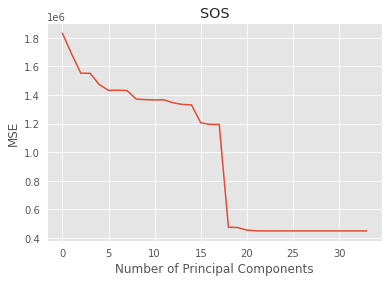

In [ ]:
#scale predictor variables
pca = PCA(n_components=24)
X_reduced = pca.fit_transform(scale(X_train))
X_red_test = pca.fit_transform(scale(X_test))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 34):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('SOS')

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.25,  19.82,  28.4 ,  35.11,  40.82,  46.28,  51.24,  56.17,
        60.95,  65.65,  70.21,  74.7 ,  79.02,  83.21,  87.21,  91.01,
        93.91,  96.03,  97.54,  98.69,  99.56, 100.01, 100.01, 100.01])

####**9.7.3 PCA Model Building**####

In [ ]:
pca_n=26
model_pcareg = LinearRegression(fit_intercept = True)
model_pcareg.fit(X_reduced[:,:pca_n],y_train)

LinearRegression()

####**9.7.4 PCA Predict**####

In [ ]:
# Output Prediction

y_pcapred = model_pcareg.predict(X_red_test[:,:pca_n])
OutputTargetforTest['PCA_Predicted_Y_Value']=list(y_pcapred)

####**9.7.5 PCA Model Evaluation**####

In [ ]:
pcabest_score=print_evaluate(y_test,y_pcapred)
#Cross Validation Evaluation
pca_cv_score=cross_val_score(model_pcareg, X_red_test[:,:pca_n], y_test, scoring='r2', cv=5)
print(pca_cv_score)
print(f"Mean CV_Score for PCA Model is : {np.mean(pca_cv_score)}")

__________________________________
MAE: 827.6101519582163
MSE: 1101994.325920224
RMSE: 1049.7591752017336
R2 Square 0.3895401574006977
__________________________________
[0.78070574 0.73776449 0.76657505 0.75890086 0.74315171]
Mean CV_Score for PCA Model is : 0.7574195702878639


###**9.8.Lasso**###

####**9.8.1 Importing Libraries**####

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score

####**9.8.2 Lasso hyperparameter Tuning**####

In [ ]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param={'alpha':[0.001,0.005,0.008,0.01,0.1,0.5,1.0,5.0]}

model= Lasso ()

model_cv=GridSearchCV(estimator=model,
                      param_grid=hyper_param,
                      scoring='r2',
                      cv=folds,
                      verbose=1,
                      return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.005, 0.008, 0.01, 0.1, 0.5, 1.0,
                                   5.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_result_l=pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha']=cv_result_l['param_alpha'].astype('float32')
cv_result_l
#mean_train_score is interested

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.184517,0.015625,0.003980,0.001965,0.001,{'alpha': 0.001},0.759087,0.755425,0.762610,0.765578,0.750348,0.769188,0.764166,0.711360,0.752686,0.764786,0.755523,0.015800,6,0.758244,0.758708,0.757796,0.757671,0.759259,0.757119,0.757817,0.763536,0.759035,0.757728,0.758691,0.001735
1,0.129151,0.016219,0.002188,0.001863,0.005,{'alpha': 0.005},0.759085,0.755417,0.762615,0.765583,0.750351,0.769193,0.764159,0.711364,0.752693,0.764781,0.755524,0.015799,5,0.758244,0.758708,0.757796,0.757671,0.759259,0.757119,0.757817,0.763536,0.759035,0.757728,0.758691,0.001735
2,0.135430,0.023452,0.002996,0.002022,0.008,{'alpha': 0.008},0.759084,0.755411,0.762619,0.765587,0.750353,0.769196,0.764154,0.711367,0.752698,0.764777,0.755525,0.015798,4,0.758244,0.758708,0.757796,0.757671,0.759259,0.757119,0.757817,0.763536,0.759035,0.757728,0.758691,0.001735
3,0.130389,0.021186,0.002099,0.001687,0.010,{'alpha': 0.01},0.759083,0.755407,0.762621,0.765589,0.750355,0.769198,0.764151,0.711370,0.752701,0.764774,0.755525,0.015798,3,0.758244,0.758708,0.757796,0.757671,0.759259,0.757119,0.757817,0.763536,0.759035,0.757728,0.758691,0.001735
4,0.080149,0.022487,0.001426,0.001200,0.100,{'alpha': 0.1},0.759030,0.755233,0.762751,0.765700,0.750437,0.769245,0.763995,0.711437,0.752810,0.764747,0.755538,0.015780,2,0.758236,0.758701,0.757789,0.757663,0.759251,0.757111,0.757810,0.763528,0.759027,0.757722,0.758684,0.001735
5,0.018270,0.006020,0.001046,0.000241,0.500,{'alpha': 0.5},0.758593,0.754465,0.763222,0.766172,0.750723,0.769592,0.763269,0.711581,0.753240,0.764535,0.755539,0.015753,1,0.758087,0.758546,0.757631,0.757507,0.759082,0.756967,0.757650,0.763358,0.758858,0.757563,0.758525,0.001730
6,0.010374,0.001715,0.001034,0.000573,1.000,{'alpha': 1.0},0.758441,0.753742,0.763756,0.766660,0.750818,0.769979,0.762484,0.711438,0.753312,0.764111,0.755474,0.015828,7,0.757876,0.758324,0.757368,0.757246,0.758807,0.756691,0.757410,0.762980,0.758526,0.757288,0.758252,0.001696
7,0.009141,0.003481,0.001103,0.000835,5.000,{'alpha': 5.0},0.759320,0.748602,0.766683,0.767368,0.750104,0.773363,0.759599,0.708811,0.752436,0.760958,0.754724,0.017047,8,0.756106,0.756689,0.755207,0.755051,0.756793,0.754702,0.755744,0.761209,0.756557,0.755447,0.756351,0.001758


####**9.8.3 Lasso Model Building**####

In [ ]:
lasso=Lasso(alpha=0.010)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

####**9.8.4 Lasso Prediction**####

In [ ]:
# Output Prediction
y_lassopred = lasso.predict(X_test)
OutputTargetforTest['Lasso_Predicted_Y_Value']=list(y_lassopred)

####**9.8.5 Lasso Model Evaluation**####

In [ ]:
lasso_r2_score=print_evaluate(y_test,y_lassopred)
#Cross Validation Evaluation
lasso_cv_score=cross_val_score(lasso, X_test, y_test, scoring='r2', cv=5)
print(lasso_cv_score)
print(f"Mean CV_Score for Standard Model is : {np.mean(lasso_cv_score)}")

__________________________________
MAE: 462.8932004240203
MSE: 429424.51794598275
RMSE: 655.3049045642667
R2 Square 0.7621163580722798
__________________________________
[0.78070463 0.73795523 0.76701783 0.75841289 0.74278654]
Mean CV_Score for Standard Model is : 0.7573754219547949


###**9.9.Ridge**###

####**9.9.1 Lasso hyperparameter Tuning**####

In [ ]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param={'alpha':[0.001,0.005,0.008,0.01,0.1,0.5,1.0,5.0]}

model= Ridge ()

model_cv=GridSearchCV(estimator=model,
                      param_grid=hyper_param,
                      scoring='r2',
                      cv=folds,
                      verbose=1,
                      return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.005, 0.008, 0.01, 0.1, 0.5, 1.0,
                                   5.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
#mean_train_score is interested
cv_result_l=pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha']=cv_result_l['param_alpha'].astype('float32')
cv_result_l


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006285,0.003362,0.001107,0.000313,0.001,{'alpha': 0.001},0.759087,0.755427,0.762608,0.765577,0.750348,0.769187,0.764167,0.711359,0.752684,0.764787,0.755523,0.015801,8,0.758244,0.758708,0.757796,0.757671,0.759259,0.757119,0.757817,0.763536,0.759035,0.757728,0.758691,0.001735
1,0.002989,0.000069,0.000695,0.000038,0.005,{'alpha': 0.005},0.759087,0.755426,0.762609,0.765577,0.750348,0.769188,0.764167,0.711359,0.752685,0.764787,0.755523,0.015800,7,0.758244,0.758708,0.757796,0.757671,0.759259,0.757119,0.757817,0.763536,0.759035,0.757728,0.758691,0.001735
2,0.003298,0.001298,0.000670,0.000027,0.008,{'alpha': 0.008},0.759087,0.755426,0.762609,0.765578,0.750348,0.769188,0.764167,0.711360,0.752685,0.764787,0.755523,0.015800,6,0.758244,0.758708,0.757796,0.757671,0.759259,0.757119,0.757817,0.763536,0.759035,0.757728,0.758691,0.001735
3,0.003177,0.001044,0.000902,0.000711,0.010,{'alpha': 0.01},0.759087,0.755426,0.762609,0.765578,0.750348,0.769188,0.764166,0.711360,0.752685,0.764787,0.755523,0.015800,5,0.758244,0.758708,0.757796,0.757671,0.759259,0.757119,0.757817,0.763536,0.759035,0.757728,0.758691,0.001735
4,0.002858,0.000032,0.000656,0.000013,0.100,{'alpha': 0.1},0.759084,0.755414,0.762616,0.765581,0.750349,0.769196,0.764160,0.711370,0.752694,0.764787,0.755525,0.015798,4,0.758244,0.758708,0.757796,0.757671,0.759259,0.757119,0.757817,0.763536,0.759035,0.757728,0.758691,0.001735
5,0.002766,0.000071,0.000643,0.000012,0.500,{'alpha': 0.5},0.759070,0.755365,0.762647,0.765597,0.750357,0.769231,0.764131,0.711412,0.752732,0.764787,0.755533,0.015789,3,0.758243,0.758708,0.757796,0.757670,0.759258,0.757118,0.757817,0.763535,0.759034,0.757728,0.758691,0.001735
6,0.002839,0.000032,0.000683,0.000083,1.000,{'alpha': 1.0},0.759056,0.755307,0.762683,0.765615,0.750365,0.769271,0.764097,0.711456,0.752773,0.764785,0.755541,0.015780,2,0.758242,0.758707,0.757794,0.757669,0.759256,0.757116,0.757816,0.763532,0.759032,0.757726,0.758689,0.001735
7,0.002948,0.000354,0.000654,0.000022,5.000,{'alpha': 5.0},0.759020,0.754945,0.762951,0.765743,0.750422,0.769511,0.763869,0.711597,0.752950,0.764739,0.755575,0.015763,1,0.758226,0.758694,0.757767,0.757642,0.759231,0.757085,0.757796,0.763492,0.758995,0.757699,0.758663,0.001731


####**9.9.2 Ridge Model Building**####

In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

####**9.9.3 Ridge Model Prediction**####

In [ ]:
# Output Prediction
y_ridgepred = ridge.predict(X_test)
OutputTargetforTest['Ridge_Predicted_Y_Value']=list(y_ridgepred)

####**9.9.4 Ridge Model Evaluation**####

In [ ]:
ridge_r2_score=print_evaluate(y_test,y_ridgepred)
#Cross Validation Evaluation
ridge_cv_score=cross_val_score(ridge, X_test, y_test, scoring='r2', cv=5)
print(ridge_cv_score)
print(f"Mean CV_Score for Ridge Model is : {np.mean(ridge_cv_score)}")

__________________________________
MAE: 462.9124188682592
MSE: 429440.48407989775
RMSE: 655.3170866686582
R2 Square 0.7621075134862711
__________________________________
[0.78069658 0.73796319 0.76703471 0.75839505 0.7427919 ]
Mean CV_Score for Ridge Model is : 0.7573762859202662


###**9.10.Elastic Net**###

####**9.10.1 Importing Libraries**####

In [ ]:
from sklearn.linear_model import ElasticNet

####**9.10.2 Elastic Net hyperparameter Tuning**####

In [ ]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param={'alpha':[0.001,0.005,0.008,0.01,0.1,0.5,1.0,5.0]}

model= ElasticNet ()

model_cv=GridSearchCV(estimator=model,
                      param_grid=hyper_param,
                      scoring='r2',
                      cv=folds,
                      verbose=1,
                      return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.005, 0.008, 0.01, 0.1, 0.5, 1.0,
                                   5.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
#mean_train_score is interested
cv_result_l=pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha']=cv_result_l['param_alpha'].astype('float32')
cv_result_l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.136095,0.019040,0.002024,0.002049,0.001,{'alpha': 0.001},0.759033,0.755173,0.762774,0.765660,0.750385,0.769360,0.764015,0.711532,0.752852,0.764774,0.755556,0.015766,4,0.758238,0.758704,0.757787,0.757662,0.759250,0.757108,0.757811,0.763521,0.759022,0.757719,0.758682,0.001734
1,0.075853,0.020640,0.001516,0.001420,0.005,{'alpha': 0.005},0.759072,0.754536,0.763322,0.765914,0.750491,0.769781,0.763590,0.711548,0.753029,0.764636,0.755592,0.015809,2,0.758186,0.758661,0.757709,0.757588,0.759178,0.757025,0.757755,0.763423,0.758928,0.757646,0.758610,0.001726
2,0.055400,0.018256,0.001102,0.000235,0.008,{'alpha': 0.008},0.759162,0.754187,0.763663,0.766061,0.750541,0.770012,0.763347,0.711399,0.753029,0.764520,0.755592,0.015882,1,0.758134,0.758618,0.757642,0.757524,0.759117,0.756959,0.757706,0.763356,0.758860,0.757588,0.758550,0.001725
3,0.046785,0.017718,0.001191,0.000389,0.010,{'alpha': 0.01},0.759223,0.753980,0.763863,0.766141,0.750563,0.770145,0.763202,0.711284,0.753011,0.764442,0.755585,0.015933,3,0.758095,0.758587,0.757594,0.757479,0.759075,0.756914,0.757672,0.763314,0.758816,0.757549,0.758509,0.001725
4,0.006784,0.000170,0.000855,0.000031,0.100,{'alpha': 0.1},0.759973,0.749672,0.766370,0.766529,0.750029,0.772339,0.760267,0.708322,0.751774,0.762036,0.754731,0.017048,5,0.756472,0.757352,0.755784,0.755836,0.757535,0.755204,0.756346,0.761988,0.757316,0.756112,0.756994,0.001815
5,0.004703,0.000835,0.000830,0.000328,0.500,{'alpha': 0.5},0.759636,0.746469,0.767113,0.765935,0.748878,0.773869,0.758143,0.706948,0.750389,0.759432,0.753681,0.017597,6,0.754615,0.755994,0.753823,0.754049,0.755799,0.753160,0.754812,0.760479,0.755623,0.754598,0.755295,0.001928
6,0.003789,0.000076,0.000708,0.000019,1.000,{'alpha': 1.0},0.759079,0.745810,0.767394,0.765655,0.748113,0.774114,0.757558,0.707213,0.749672,0.758581,0.753319,0.017562,7,0.753985,0.755500,0.753168,0.753433,0.755202,0.752432,0.754257,0.759911,0.755033,0.754087,0.754701,0.001958
7,0.006009,0.003118,0.000798,0.000159,5.000,{'alpha': 5.0},0.754879,0.745304,0.768502,0.763627,0.743977,0.771595,0.755612,0.710860,0.746338,0.756842,0.751754,0.016338,8,0.752095,0.753653,0.751120,0.751437,0.753365,0.750289,0.752342,0.757927,0.753168,0.752283,0.752768,0.001986


####**9.10.3 Elastic net Model Building**####

In [ ]:
elasticNet=ElasticNet(alpha=0.001)
elasticNet.fit(X_train,y_train)

ElasticNet(alpha=0.001)

####**9.10.4 Elastic Net Model Prediction**####

In [ ]:
# Output Prediction
y_elasticpred = elasticNet.predict(X_test)
OutputTargetforTest['Elasticnet_Predicted_Y_Value']=list(y_elasticpred)

####**9.10.5 Elastic Net Model Evaluation**##

In [ ]:
elasticnet_r2score=print_evaluate(y_test,y_elasticpred)
#Cross Validation Evaluation
elasticNet_cv_score=cross_val_score(elasticNet, X_test, y_test, scoring='r2', cv=5)
print(elasticNet_cv_score)
print(f"Mean CV_Score for Elastic Net Model is : {np.mean(elasticNet_cv_score)}")

__________________________________
MAE: 462.5297833924832
MSE: 429116.9971918317
RMSE: 655.070223099655
R2 Square 0.7622867120085565
__________________________________
[0.78063815 0.73812698 0.76722956 0.75834206 0.7429787 ]
Mean CV_Score for Elastic Net Model is : 0.7574630898871291


###**9.11.Random Forest Tree Model**###

####**9.11.1 Importing Libraries**####

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

####<b>9.11.2 Hyper Parameter Tuning</b>####

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
# Create a based model
rf = RandomForestRegressor()

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

####<b>9.11.3 Model Building</b>####

In [ ]:
best_tree=RandomForestRegressor(max_depth=13, min_samples_leaf=10, min_samples_split=100,random_state=2)

In [ ]:
best_tree.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, min_samples_leaf=10, min_samples_split=100,
                      random_state=2)

####<b>9.11.4 Model Prediction</b>####

In [ ]:
# Output Prediction
y_randomforesttreepred = best_tree.predict(X_test)
OutputTargetforTest['RandomForestTree_Predicted_Y_Value']=list(y_randomforesttreepred)

####<b>9.11.5 Model Evaluation</b>####

In [ ]:
Randomforest_r2score=print_evaluate(y_test,y_randomforesttreepred)
#Cross Validation Evaluation
Randomforest_cv_score=cross_val_score(best_tree, X_test, y_test, scoring='r2', cv=5)
print(Randomforest_cv_score)
print(f"Mean CV_Score for RandomForest Model is : {np.mean(Randomforest_cv_score)}")

__________________________________
MAE: 124.92278826880921
MSE: 39640.8154551068
RMSE: 199.1000136994139
R2 Square 0.978040607474975
__________________________________
[0.91961234 0.91124884 0.93419494 0.91210025 0.92743151]
Mean CV_Score for RandomForest Model is : 0.9209175749658591


###**10.Model Comparison based on R2 Score**###

In [ ]:
modelr2score=pd.DataFrame()
modelname=['Basic Linear Regression','Normalized Model','Standardized Model','Power Model','Grid Search Model','Best Subset Regression','PCR','Lasso','Ridge','Elastic Net','Random Forest']
model_r2_score=[basic_R2_Score,Normal_R2_score,Standard_R2_score,Powermodel_R2_score,Gridsearch_R2_score,kbest_r2score,pcabest_score,lasso_r2_score,ridge_r2_score,elasticnet_r2score,Randomforest_r2score]

modelr2score=pd.DataFrame({'Model_Name':modelname,'R2_Score':model_r2_score})

modelr2score.sort_values(by=['R2_Score'],ascending=False,inplace=True)

modelr2score.reset_index(inplace=True)

###**11. Exporting the Output**###

In [ ]:
OutputTargetforTest.to_csv('/content/drive/MyDrive/Data for Practice/Project/Predicted_IITMShopRegression_Output.csv')
coeff_df.to_csv('/content/drive/MyDrive/Data for Practice/Project/Predicted_IITMShopRegression_Coefficients.csv')
modelr2score.to_csv('/content/drive/MyDrive/Data for Practice/Project/ModelScores.csv')
OutlierremovedFrame.to_csv('/content/drive/MyDrive/Data for Practice/Project/Tableauinputdata.csv')

In [ ]:
OutlierremovedFrame.to_xls('/content/drive/MyDrive/Data for Practice/Project/Tableauinputdata.csv')

In [ ]:
OutlierremovedFrame.to_excel('/content/drive/MyDrive/Data for Practice/Project/Tableauinputdata.xlsx')